In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

G = nx.read_edgelist("data/advogato.txt")
G = G.to_undirected()
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])
G = nx.convert_node_labels_to_integers(G, first_label=0)
matrix = nx.adjacency_matrix(G).toarray()

In [2]:
n_values = range(1, 3)  # Valores de n para calcular A^n

In [3]:
# time 15m 17.8s
for n in n_values:
    An = np.linalg.matrix_power(matrix, n)

In [5]:
# time 1m 58.0s
eigenvalues, eigenvectors = np.linalg.eig(matrix)
eigenvectors_inv = np.linalg.inv(eigenvectors)
for n in n_values:
    Dn = np.diag(eigenvalues ** n)
    An = eigenvectors @ Dn @ eigenvectors_inv

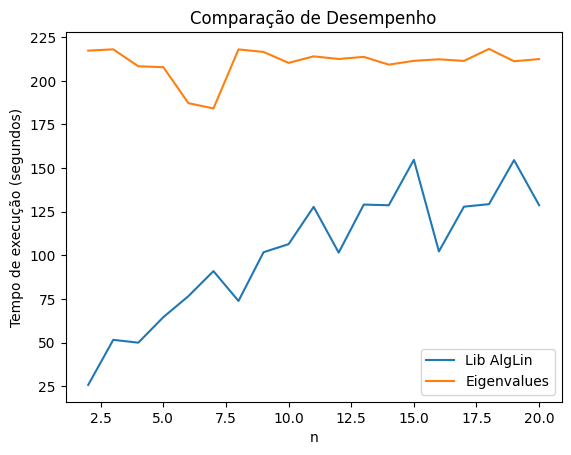

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

N = 10000
matrix = 10*np.random.rand(N,N)

n_values = np.arange(2, 21)

execution_times_lib = []
execution_times_diagonal = []

eigenvalues, eigenvectors = np.linalg.eig(matrix)
eigenvectors_inv = np.linalg.inv(eigenvectors)

for n in n_values:
    start_time = time.time()
    matrix_power = np.linalg.matrix_power(matrix, n)
    end_time = time.time()
    execution_time_lib = end_time - start_time
    execution_times_lib.append(execution_time_lib)

    start_time = time.time()
    D_power = np.diag(eigenvalues ** n)
    M_power = (eigenvectors @ D_power @ eigenvectors_inv).round(5)
    end_time = time.time()
    execution_time_diagonal = end_time - start_time
    execution_times_diagonal.append(execution_time_diagonal)
    
    #print(matrix_power)
    #print(M_power)

plt.plot(n_values, execution_times_lib, label='Lib AlgLin')
plt.plot(n_values, execution_times_diagonal, label='Eigenvalues')
plt.xlabel('n')
plt.ylabel('Tempo de execução (segundos)')
plt.title('Comparação de Desempenho')
plt.legend()
plt.show()

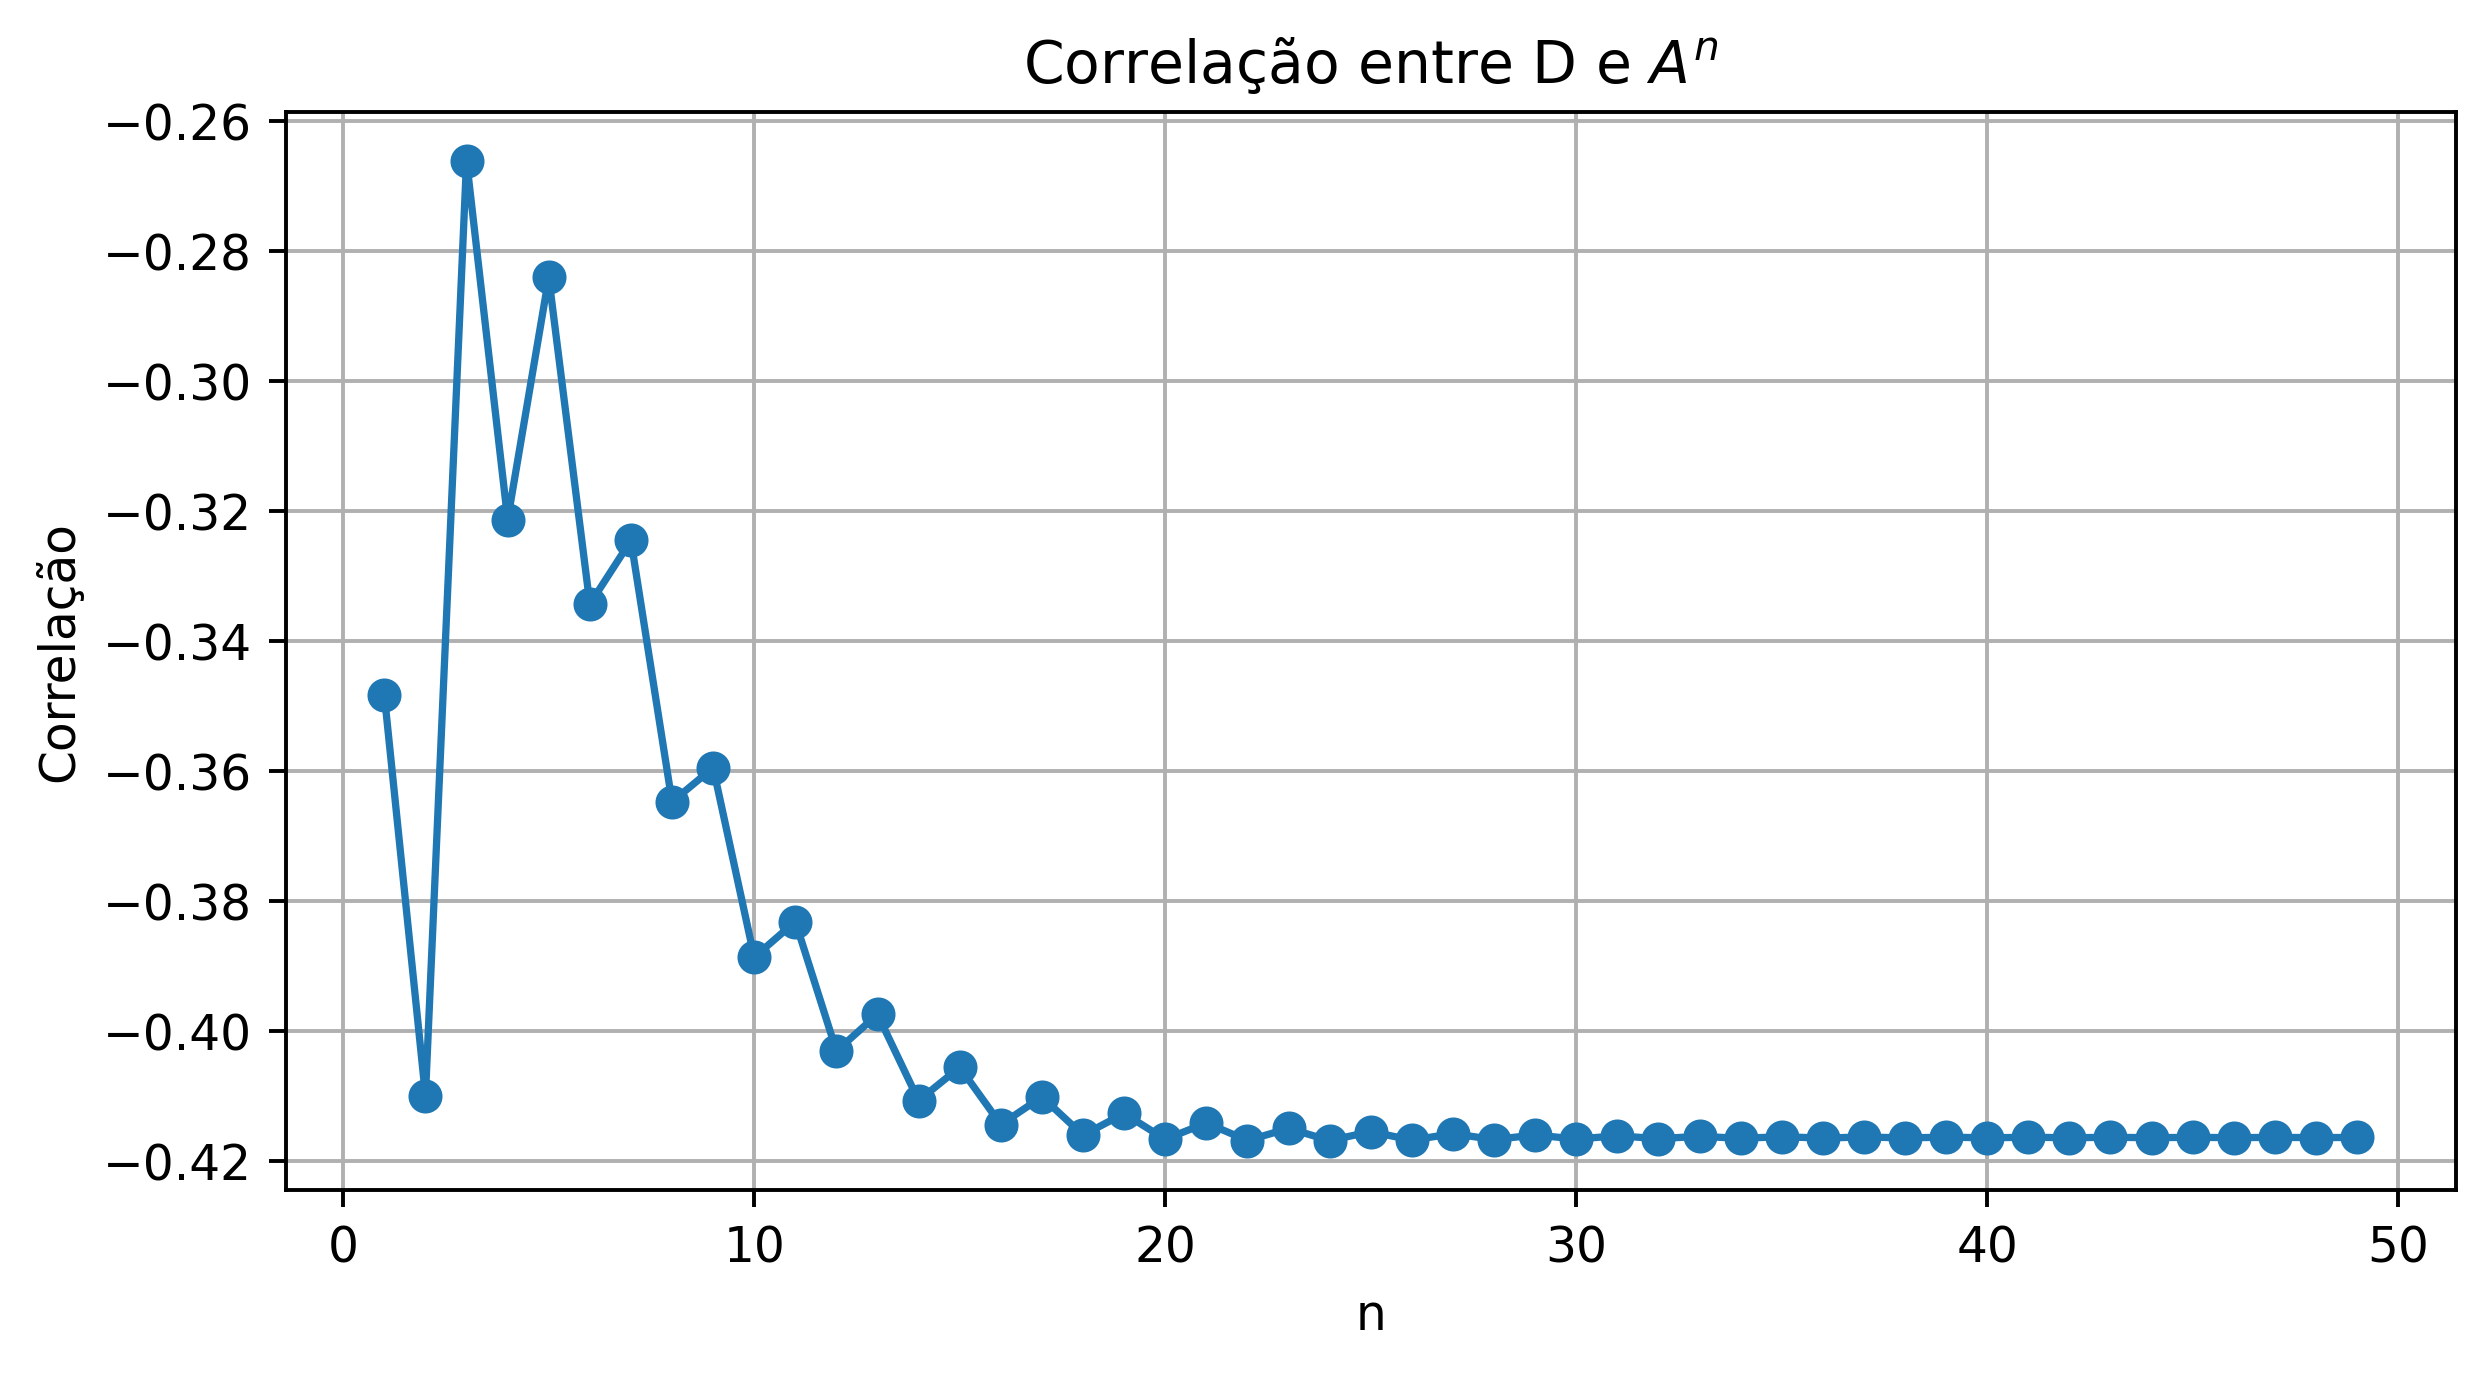

In [71]:
import numpy as np
import networkx as nx
from numpy  import *
import matplotlib.pyplot as plt
import scipy.sparse as sp
import scipy.sparse.csgraph as csgraph

# Matriz de adjacência do grafo.
A = np.array([
#    0  1  2  3  4  5  
    [0, 1, 0, 0, 1, 0], # 0
    [1, 0, 1, 0, 1, 0], # 1
    [0, 1, 0, 1, 0, 0], # 2
    [0, 0, 1, 0, 1, 1], # 3
    [1, 1, 0, 1, 0, 0], # 4
    [0, 0, 0, 1, 0, 0], # 5
    ]) 
# Gera grafo a partir da matriz de adjacência.
G = nx.from_numpy_array(np.array(A), create_using=nx.Graph)  
A = nx.adjacency_matrix(G).toarray()

adj_sparse = sp.csr_matrix(A)
D = csgraph.shortest_path(adj_sparse, method='D', directed=False)

# Calcula potênciação 
eigenvalues, eigenvectors = np.linalg.eig(A)
eigenvectors_inv = np.linalg.inv(eigenvectors)
correlations = []
n_values = range(1, 50)
for n in n_values:
    d_power = np.diag(eigenvalues ** n)
    A_power = eigenvectors @ d_power @ eigenvectors_inv
    correlation = np.corrcoef(D.flatten(), A_power.real.round(0).flatten())[0, 1]
    correlations.append(correlation)

# Plotar o gráfico da correlação
plt.figure(figsize=(8,4),dpi=350)
plt.plot(n_values, correlations, marker='o')
plt.xlabel('n')
plt.ylabel('Correlação')
plt.title('Correlação entre D e $A^n$')
plt.grid(True)
plt.show()

In [70]:
import numpy as np
import networkx as nx
from numpy  import *
import matplotlib.pyplot as plt
import scipy.sparse as sp
import scipy.sparse.csgraph as csgraph

# Matriz de adjacência do grafo.
A = np.array([
#    0  1  2  3  4  5  
    [0, 1, 0, 0, 1, 0], # 0
    [1, 0, 1, 0, 1, 0], # 1
    [0, 1, 0, 1, 0, 0], # 2
    [0, 0, 1, 0, 1, 1], # 3
    [1, 1, 0, 1, 0, 0], # 4
    [0, 0, 0, 1, 0, 0], # 5
    ]) 
# Gera grafo a partir da matriz de adjacência.
G = nx.from_numpy_array(np.array(A), create_using=nx.Graph)  
A = nx.adjacency_matrix(G).toarray()

adj_sparse = sp.csr_matrix(A)
D = csgraph.shortest_path(adj_sparse, method='D', directed=False)

print("D=")
print(D.astype(int))

# Calcula potênciação 
eigenvalues, eigenvectors = np.linalg.eig(A)
eigenvectors_inv = np.linalg.inv(eigenvectors)

print("A=")
print(A)

n_values = range(1, 5)
for n in n_values:
    d_power = np.diag(eigenvalues ** n)
    A_power = (eigenvectors @ d_power @ eigenvectors_inv).round(0).astype(int)
    print(f"A^{n}\n", A_power)
    correlation = np.corrcoef(D.flatten(), A_power.flatten())[0, 1]
    print(f"correlation={correlation}")

D=
[[0 1 2 2 1 3]
 [1 0 1 2 1 3]
 [2 1 0 1 2 2]
 [2 2 1 0 1 1]
 [1 1 2 1 0 2]
 [3 3 2 1 2 0]]
A=
[[0 1 0 0 1 0]
 [1 0 1 0 1 0]
 [0 1 0 1 0 0]
 [0 0 1 0 1 1]
 [1 1 0 1 0 0]
 [0 0 0 1 0 0]]
A^1
 [[0 1 0 0 1 0]
 [1 0 1 0 1 0]
 [0 1 0 1 0 0]
 [0 0 1 0 1 1]
 [1 1 0 1 0 0]
 [0 0 0 1 0 0]]
correlation=-0.34832460699162293
A^2
 [[2 1 1 1 1 0]
 [1 3 0 2 1 0]
 [1 0 2 0 2 1]
 [1 2 0 3 0 0]
 [1 1 2 0 3 1]
 [0 0 1 0 1 1]]
correlation=-0.40999193310845505
A^3
 [[2 4 2 2 4 1]
 [4 2 5 1 6 2]
 [2 5 0 5 1 0]
 [2 1 5 0 6 3]
 [4 6 1 6 2 0]
 [1 2 0 3 0 0]]
correlation=-0.26603305131554883
A^4
 [[ 8  8  6  7  8  2]
 [ 8 15  3 13  7  1]
 [ 6  3 10  1 12  5]
 [ 7 13  1 14  3  0]
 [ 8  7 12  3 16  6]
 [ 2  1  5  0  6  3]]
correlation=-0.3213025711351421


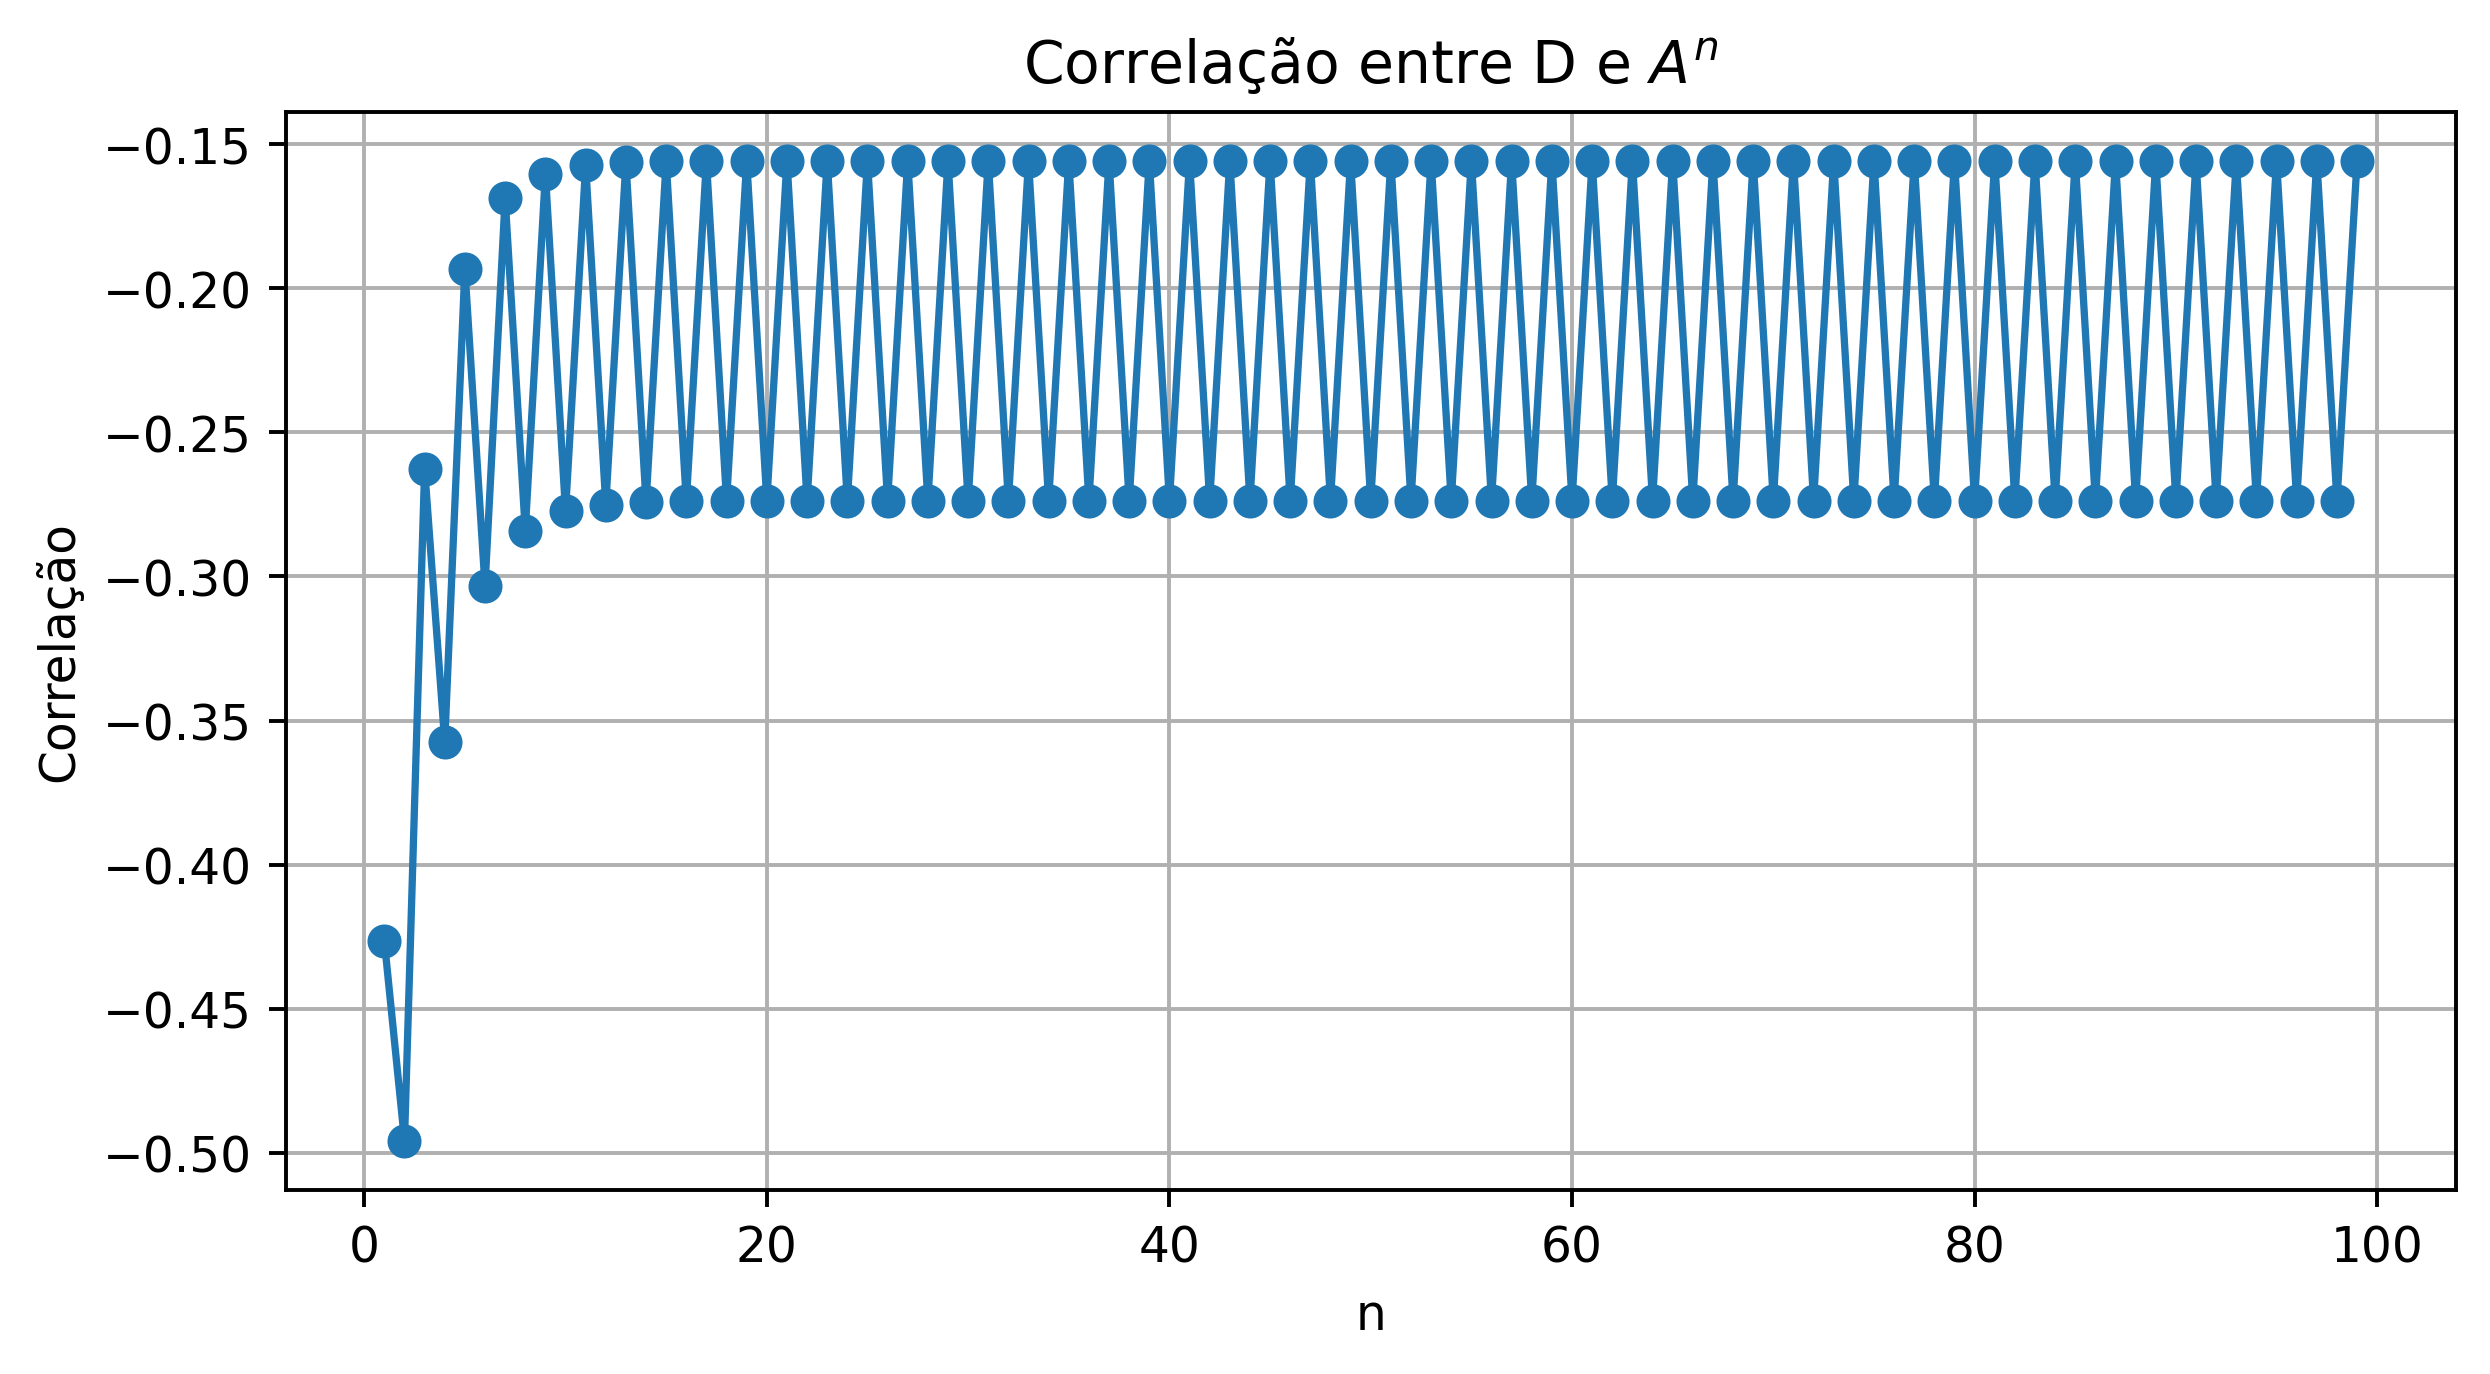

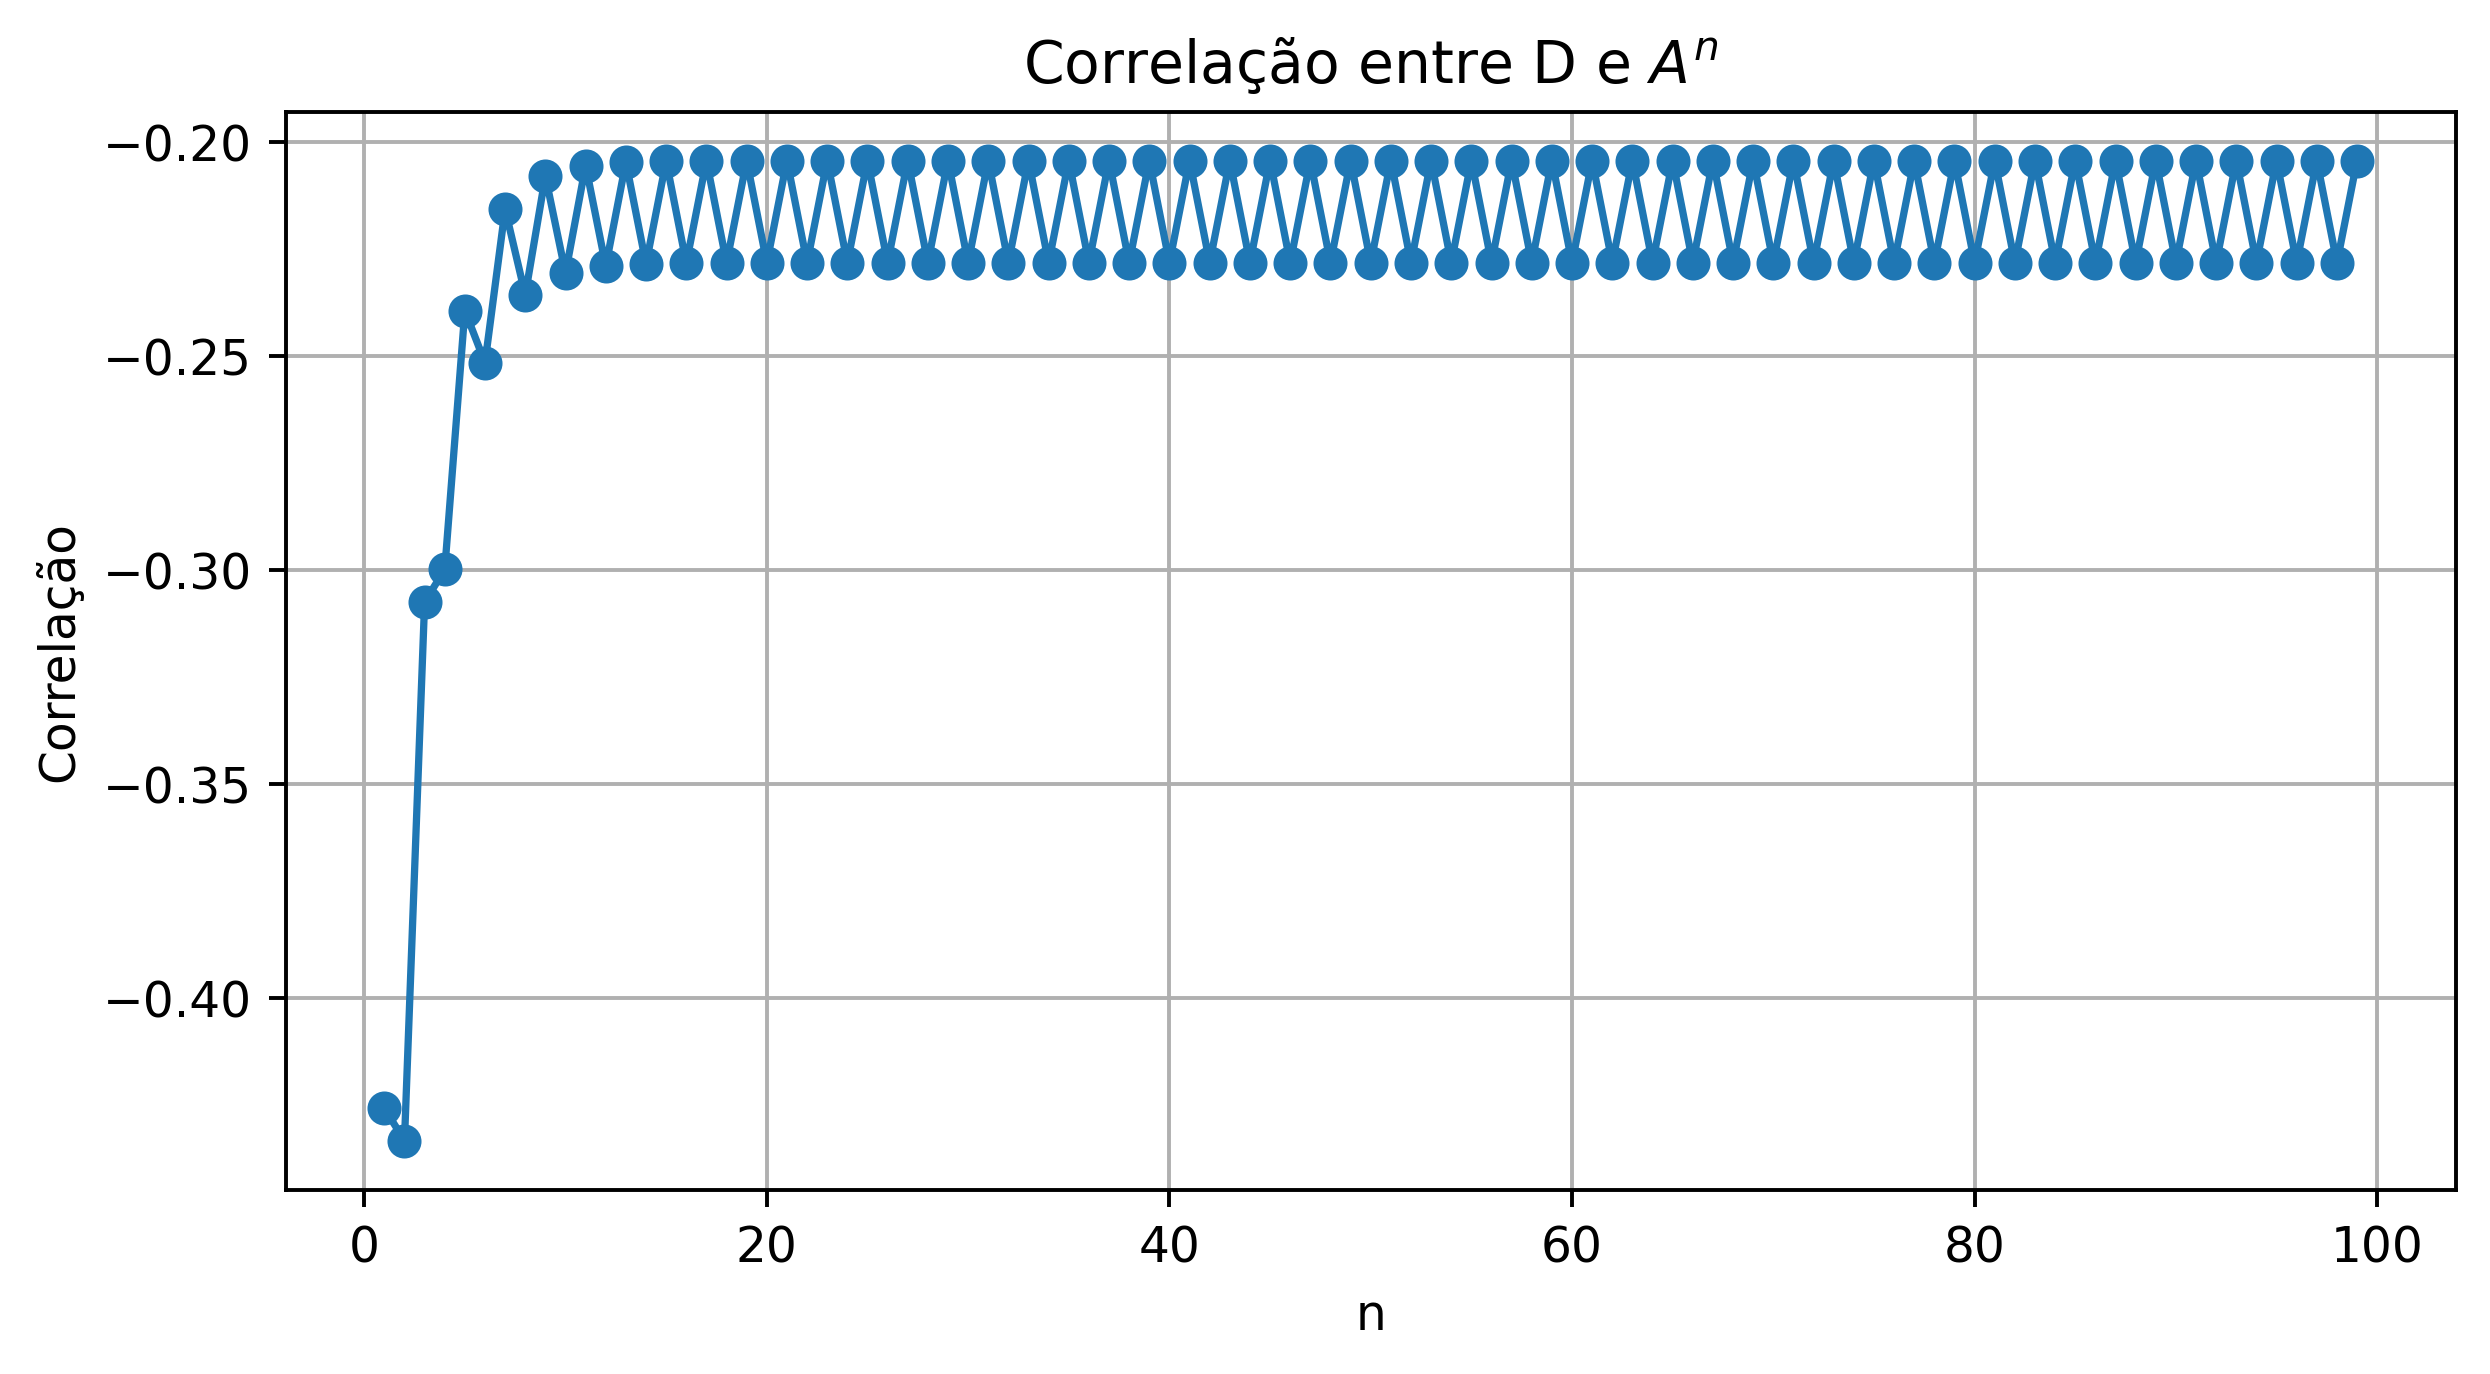

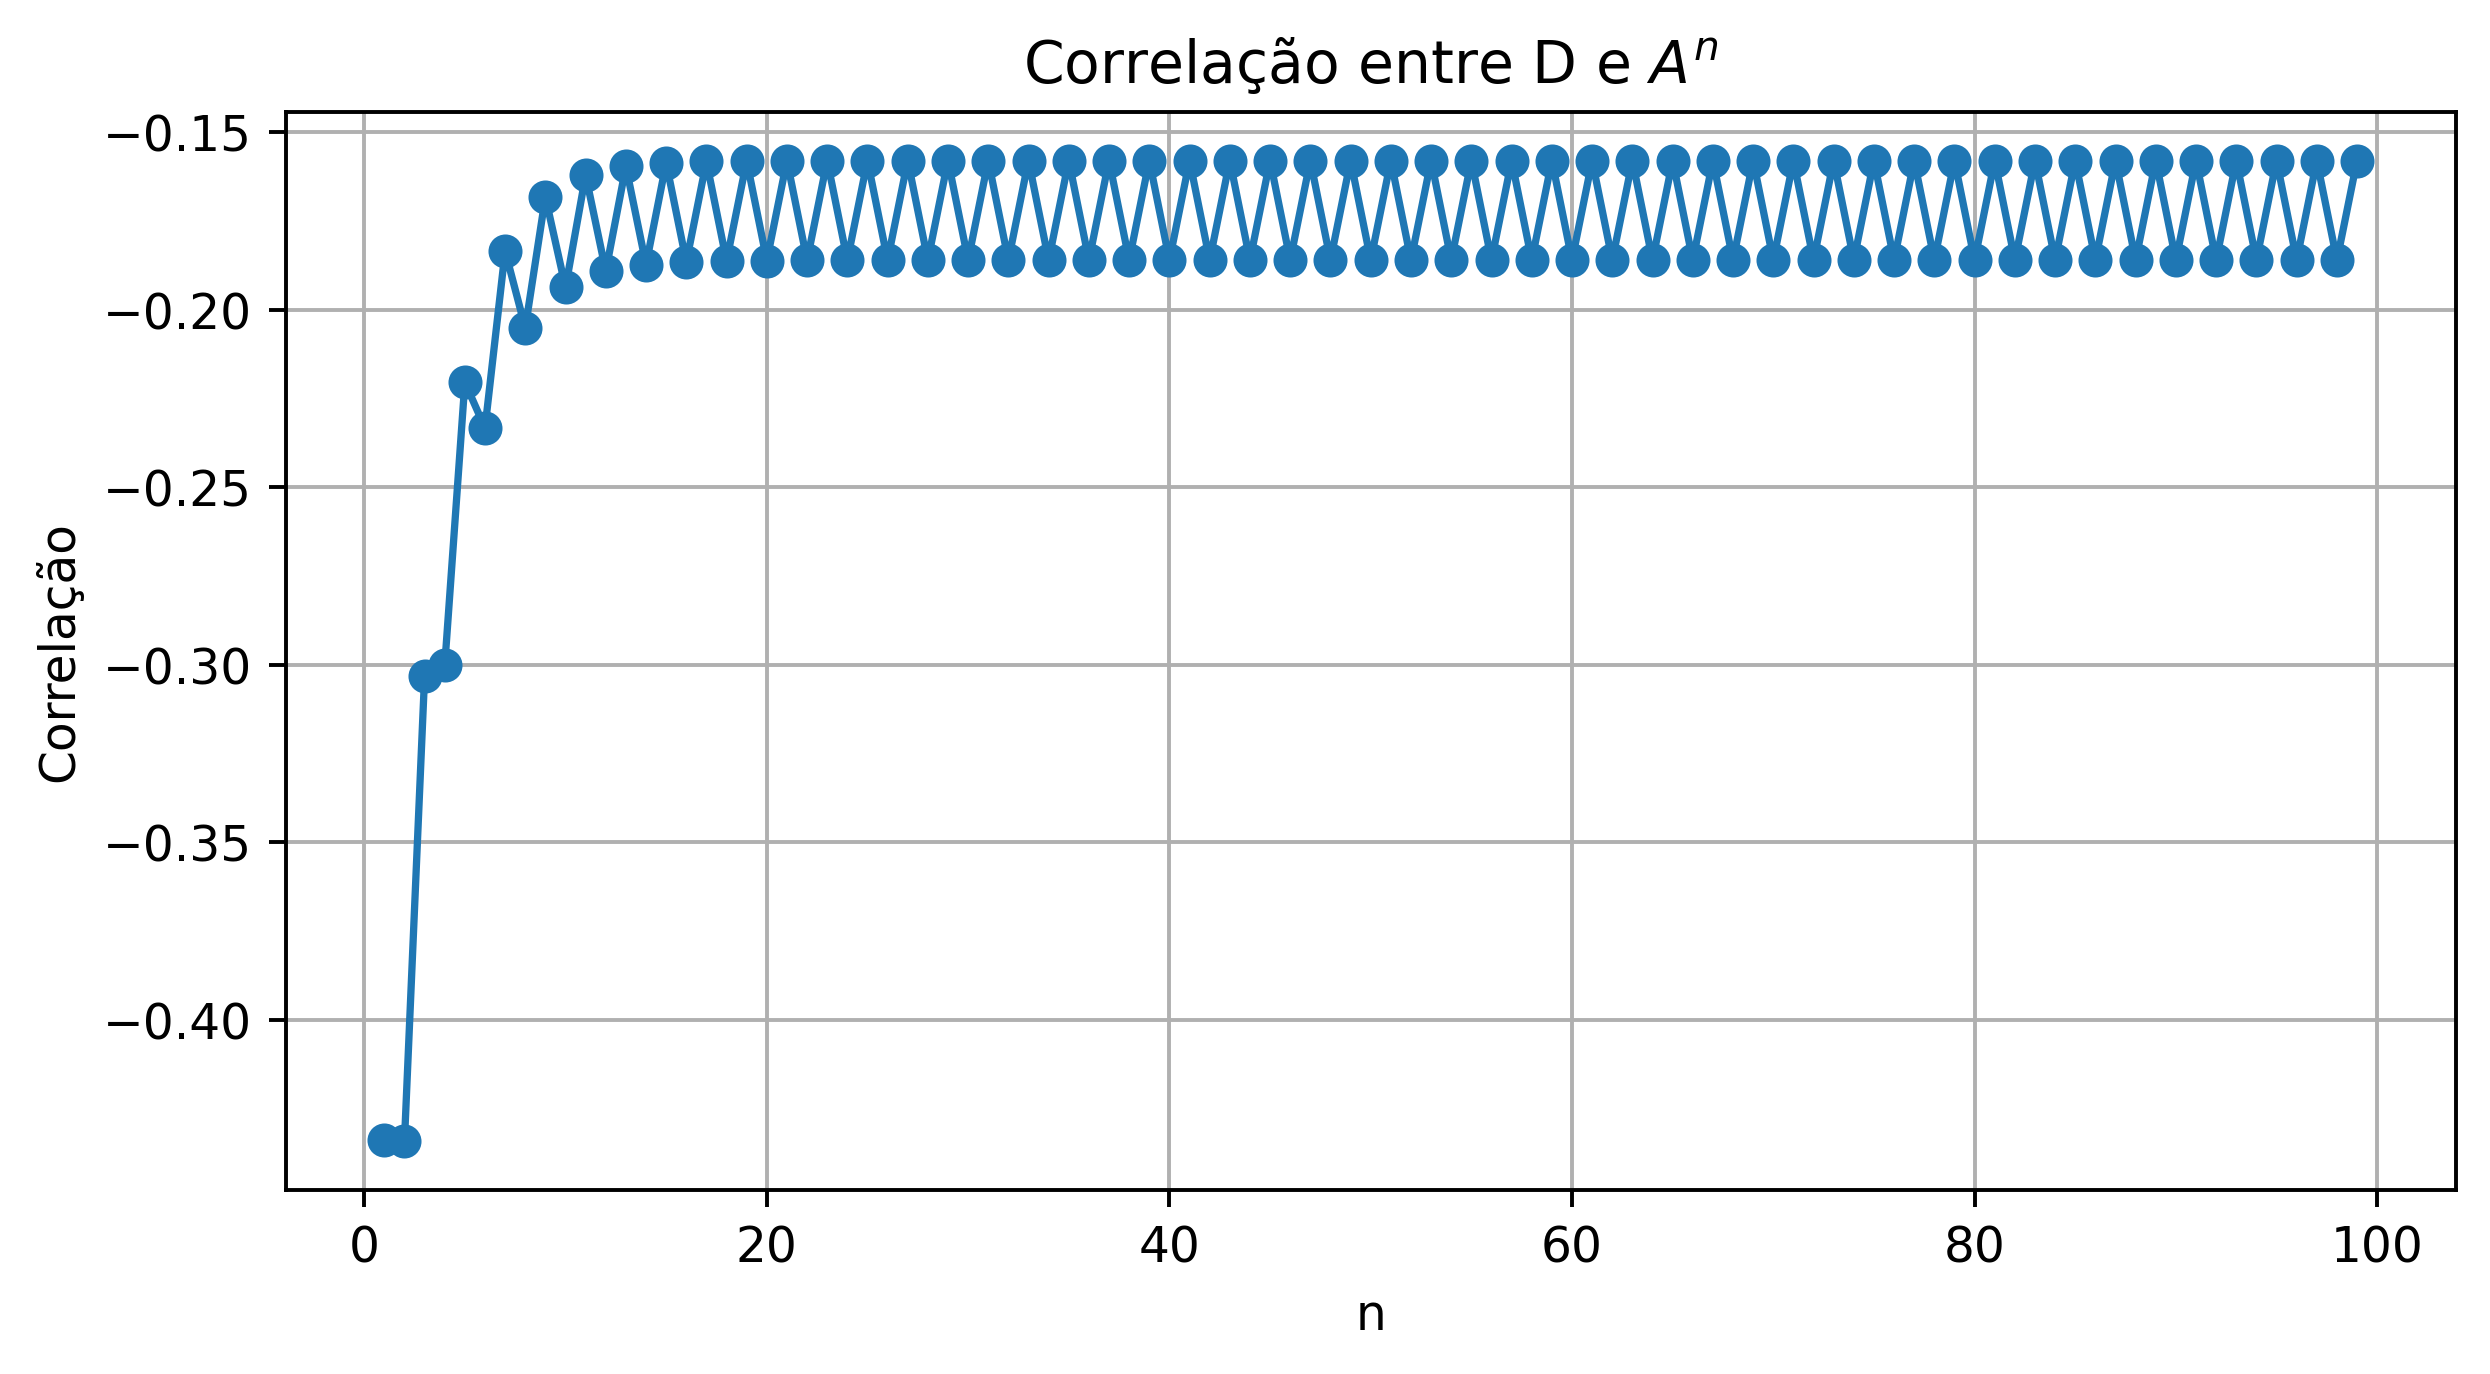

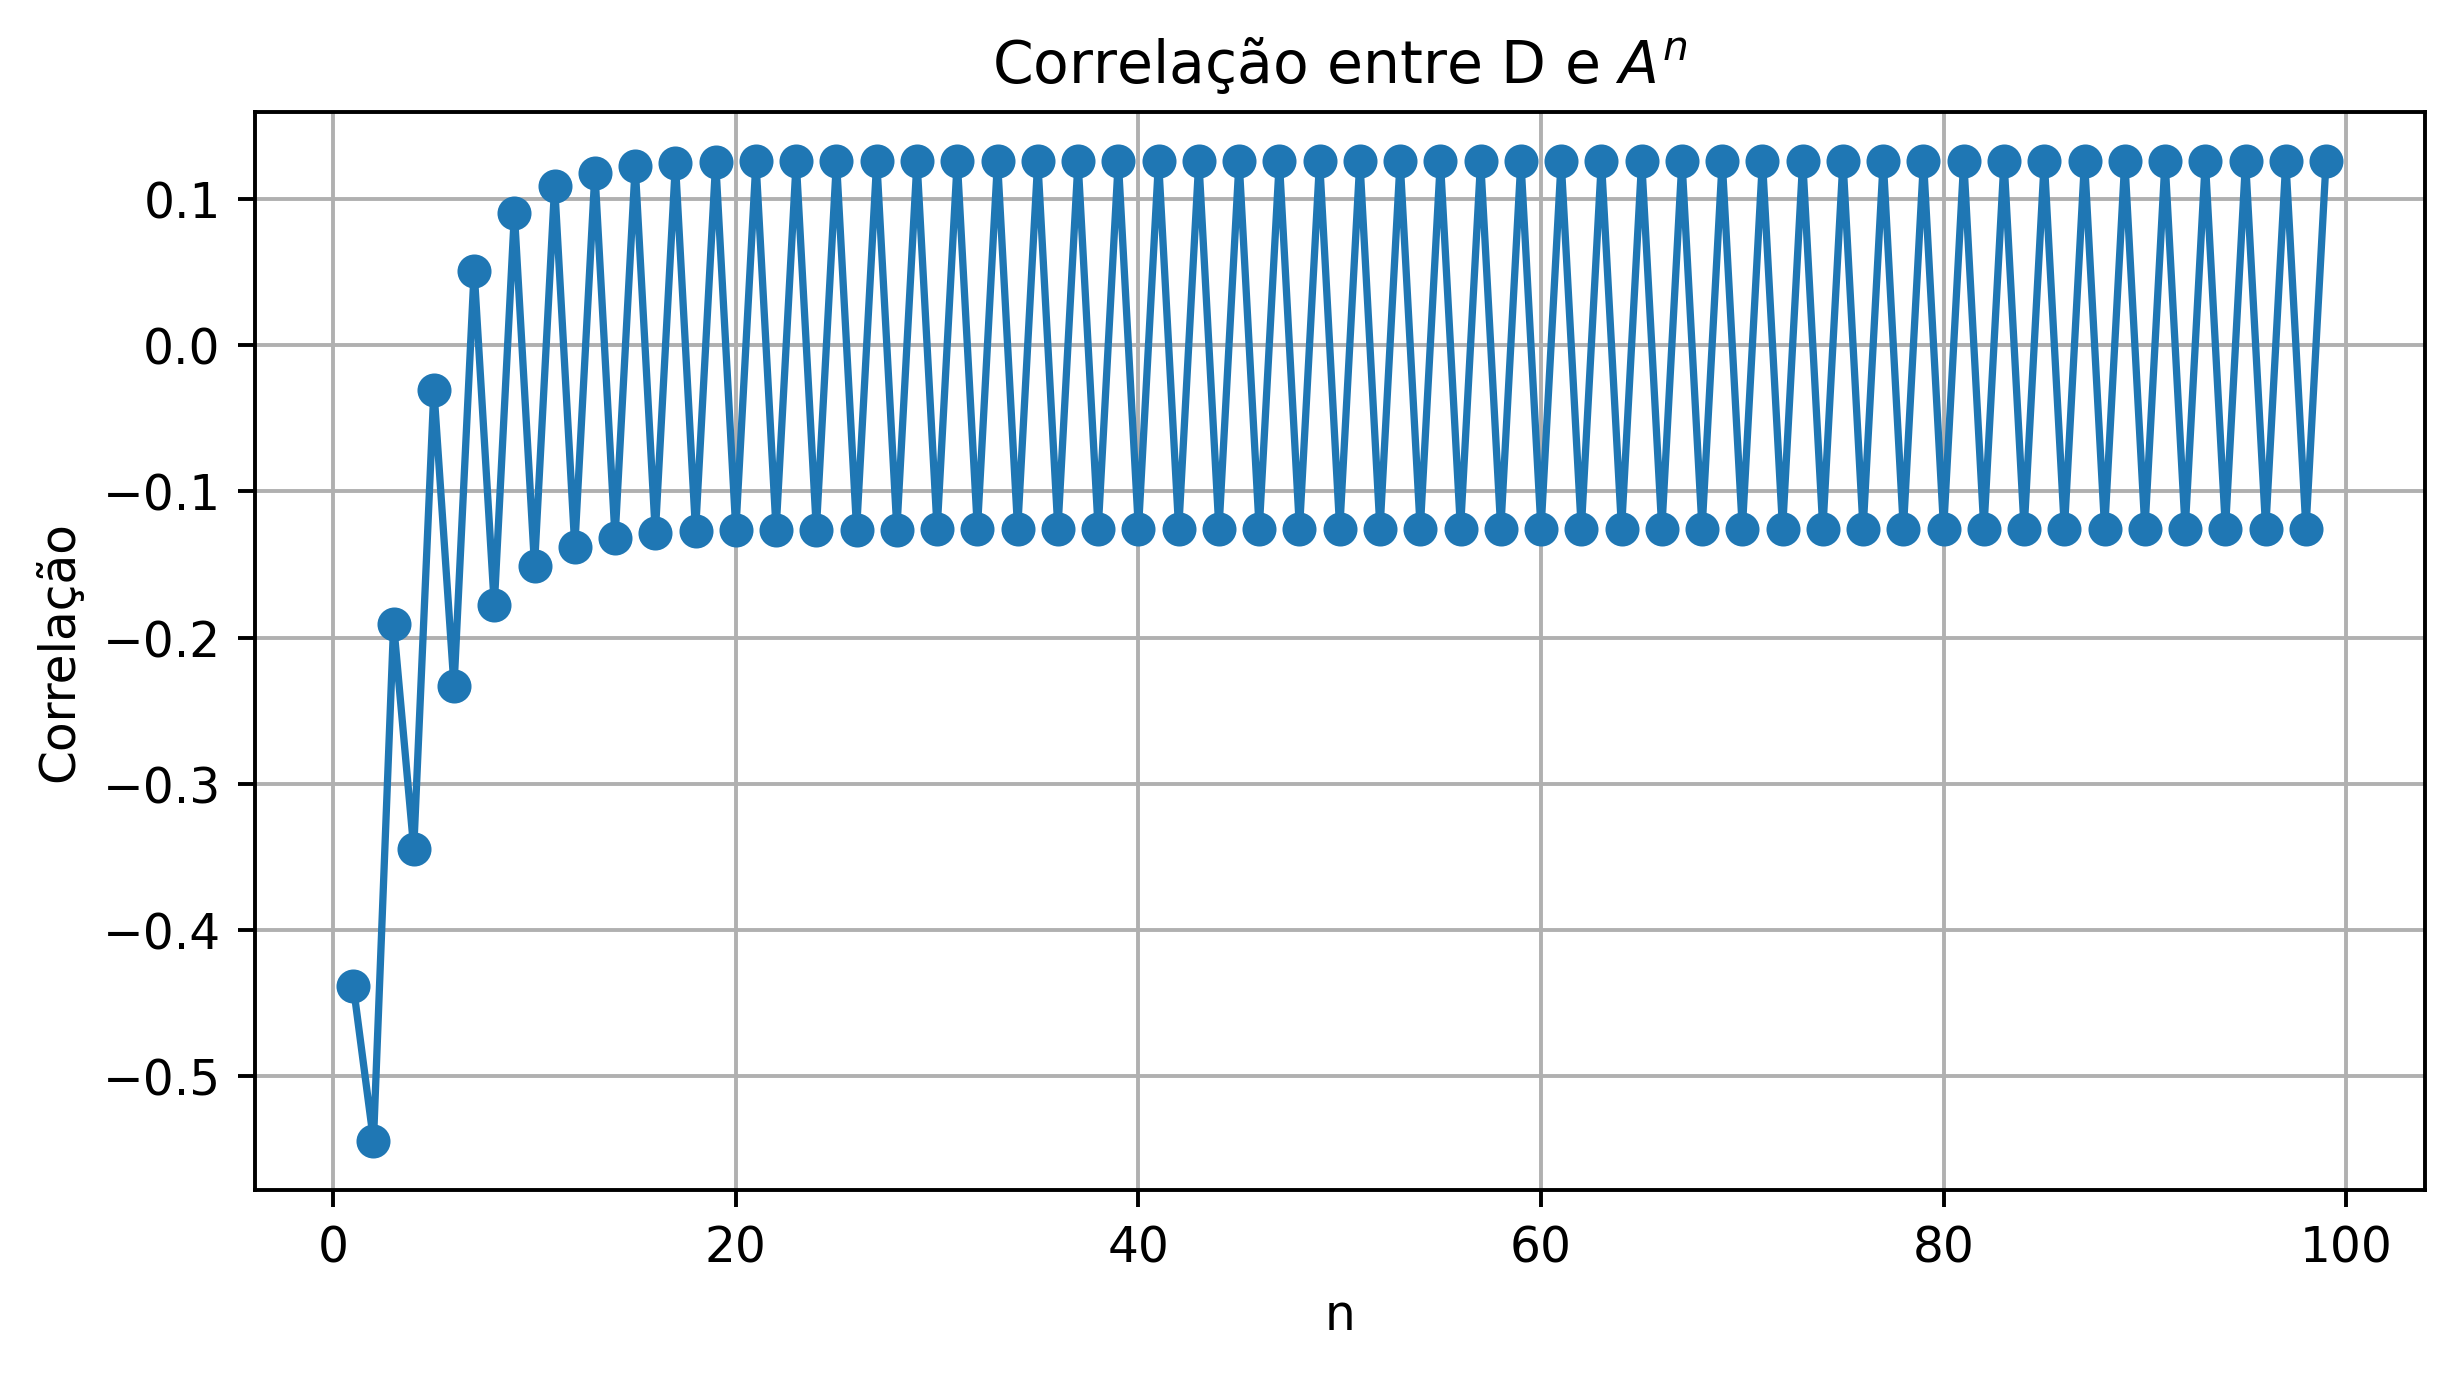

In [75]:
import numpy as np
import networkx as nx
from numpy  import *
import matplotlib.pyplot as plt
import scipy.sparse as sp
import scipy.sparse.csgraph as csgraph

def corr_D_An(A):
    # Gera grafo a partir da matriz de adjacência.
    G = nx.from_numpy_array(np.array(A), create_using=nx.Graph)  
    A = nx.adjacency_matrix(G).toarray()

    adj_sparse = sp.csr_matrix(A)
    D = csgraph.shortest_path(adj_sparse, method='D', directed=False)

    # Calcula potênciação 
    eigenvalues, eigenvectors = np.linalg.eig(A)
    eigenvectors_inv = np.linalg.inv(eigenvectors)
    correlations = []
    n_values = range(1, 100)
    for n in n_values:
        d_power = np.diag(eigenvalues ** n)
        A_power = eigenvectors @ d_power @ eigenvectors_inv
        correlation = np.corrcoef(D.flatten(), A_power.real.round(0).flatten())[0, 1]
        correlations.append(correlation)

    # Plotar o gráfico da correlação
    plt.figure(figsize=(8,4),dpi=350)
    plt.plot(n_values, correlations, marker='o')
    plt.xlabel('n')
    plt.ylabel('Correlação')
    plt.title('Correlação entre D e $A^n$')
    plt.grid(True)
    plt.show()

A1 = np.array([
#    0 1 2 3 4 5 6
    [0,1,0,0,0,0,1], # 0
    [1,0,1,1,0,0,0], # 1
    [0,1,0,0,0,0,0], # 2
    [0,1,0,0,1,1,0], # 3
    [0,0,0,1,0,0,0], # 4
    [0,0,0,1,0,0,0], # 5
    [1,0,0,0,0,0,0]  # 6
    ]) 

A2 = np.array([
#    0 1 2 3 4 5 6
    [0,1,1,0,0,0,1], # 0
    [1,0,0,1,0,0,0], # 1
    [1,0,0,1,0,0,0], # 2
    [0,1,1,0,1,0,0], # 3
    [0,0,0,1,0,1,0], # 4
    [0,0,0,0,1,0,0], # 5
    [1,0,0,0,0,0,0]  # 6
    ]) 


A3 = np.array([
#    0 1 2 3 4 5 6
    [0,1,0,0,0,0,1], # 0
    [1,0,1,1,0,0,0], # 1
    [0,1,0,0,0,0,1], # 2
    [0,1,0,0,1,1,0], # 3
    [0,0,0,1,0,0,0], # 4
    [0,0,0,1,0,0,0], # 5
    [1,0,1,0,0,0,0]  # 6
    ]) 


A4 = np.array([
#    0 1 2 3 4 5 6
    [0,1,0,0,0,0,1], # 0
    [1,0,1,0,0,0,0], # 1
    [0,1,0,1,0,0,0], # 2
    [0,0,1,0,1,0,0], # 3
    [0,0,0,1,0,1,0], # 4
    [0,0,0,0,1,0,1], # 5
    [1,0,0,0,0,1,0]  # 6
    ]) 

corr_D_An(A1)

corr_D_An(A2)

corr_D_An(A3)

corr_D_An(A4)

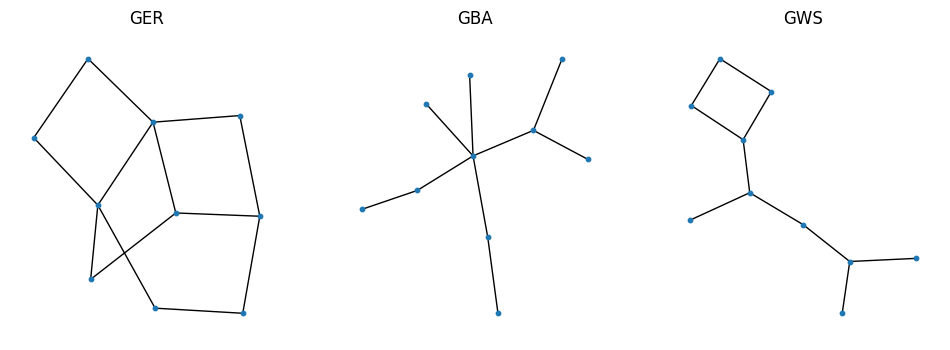

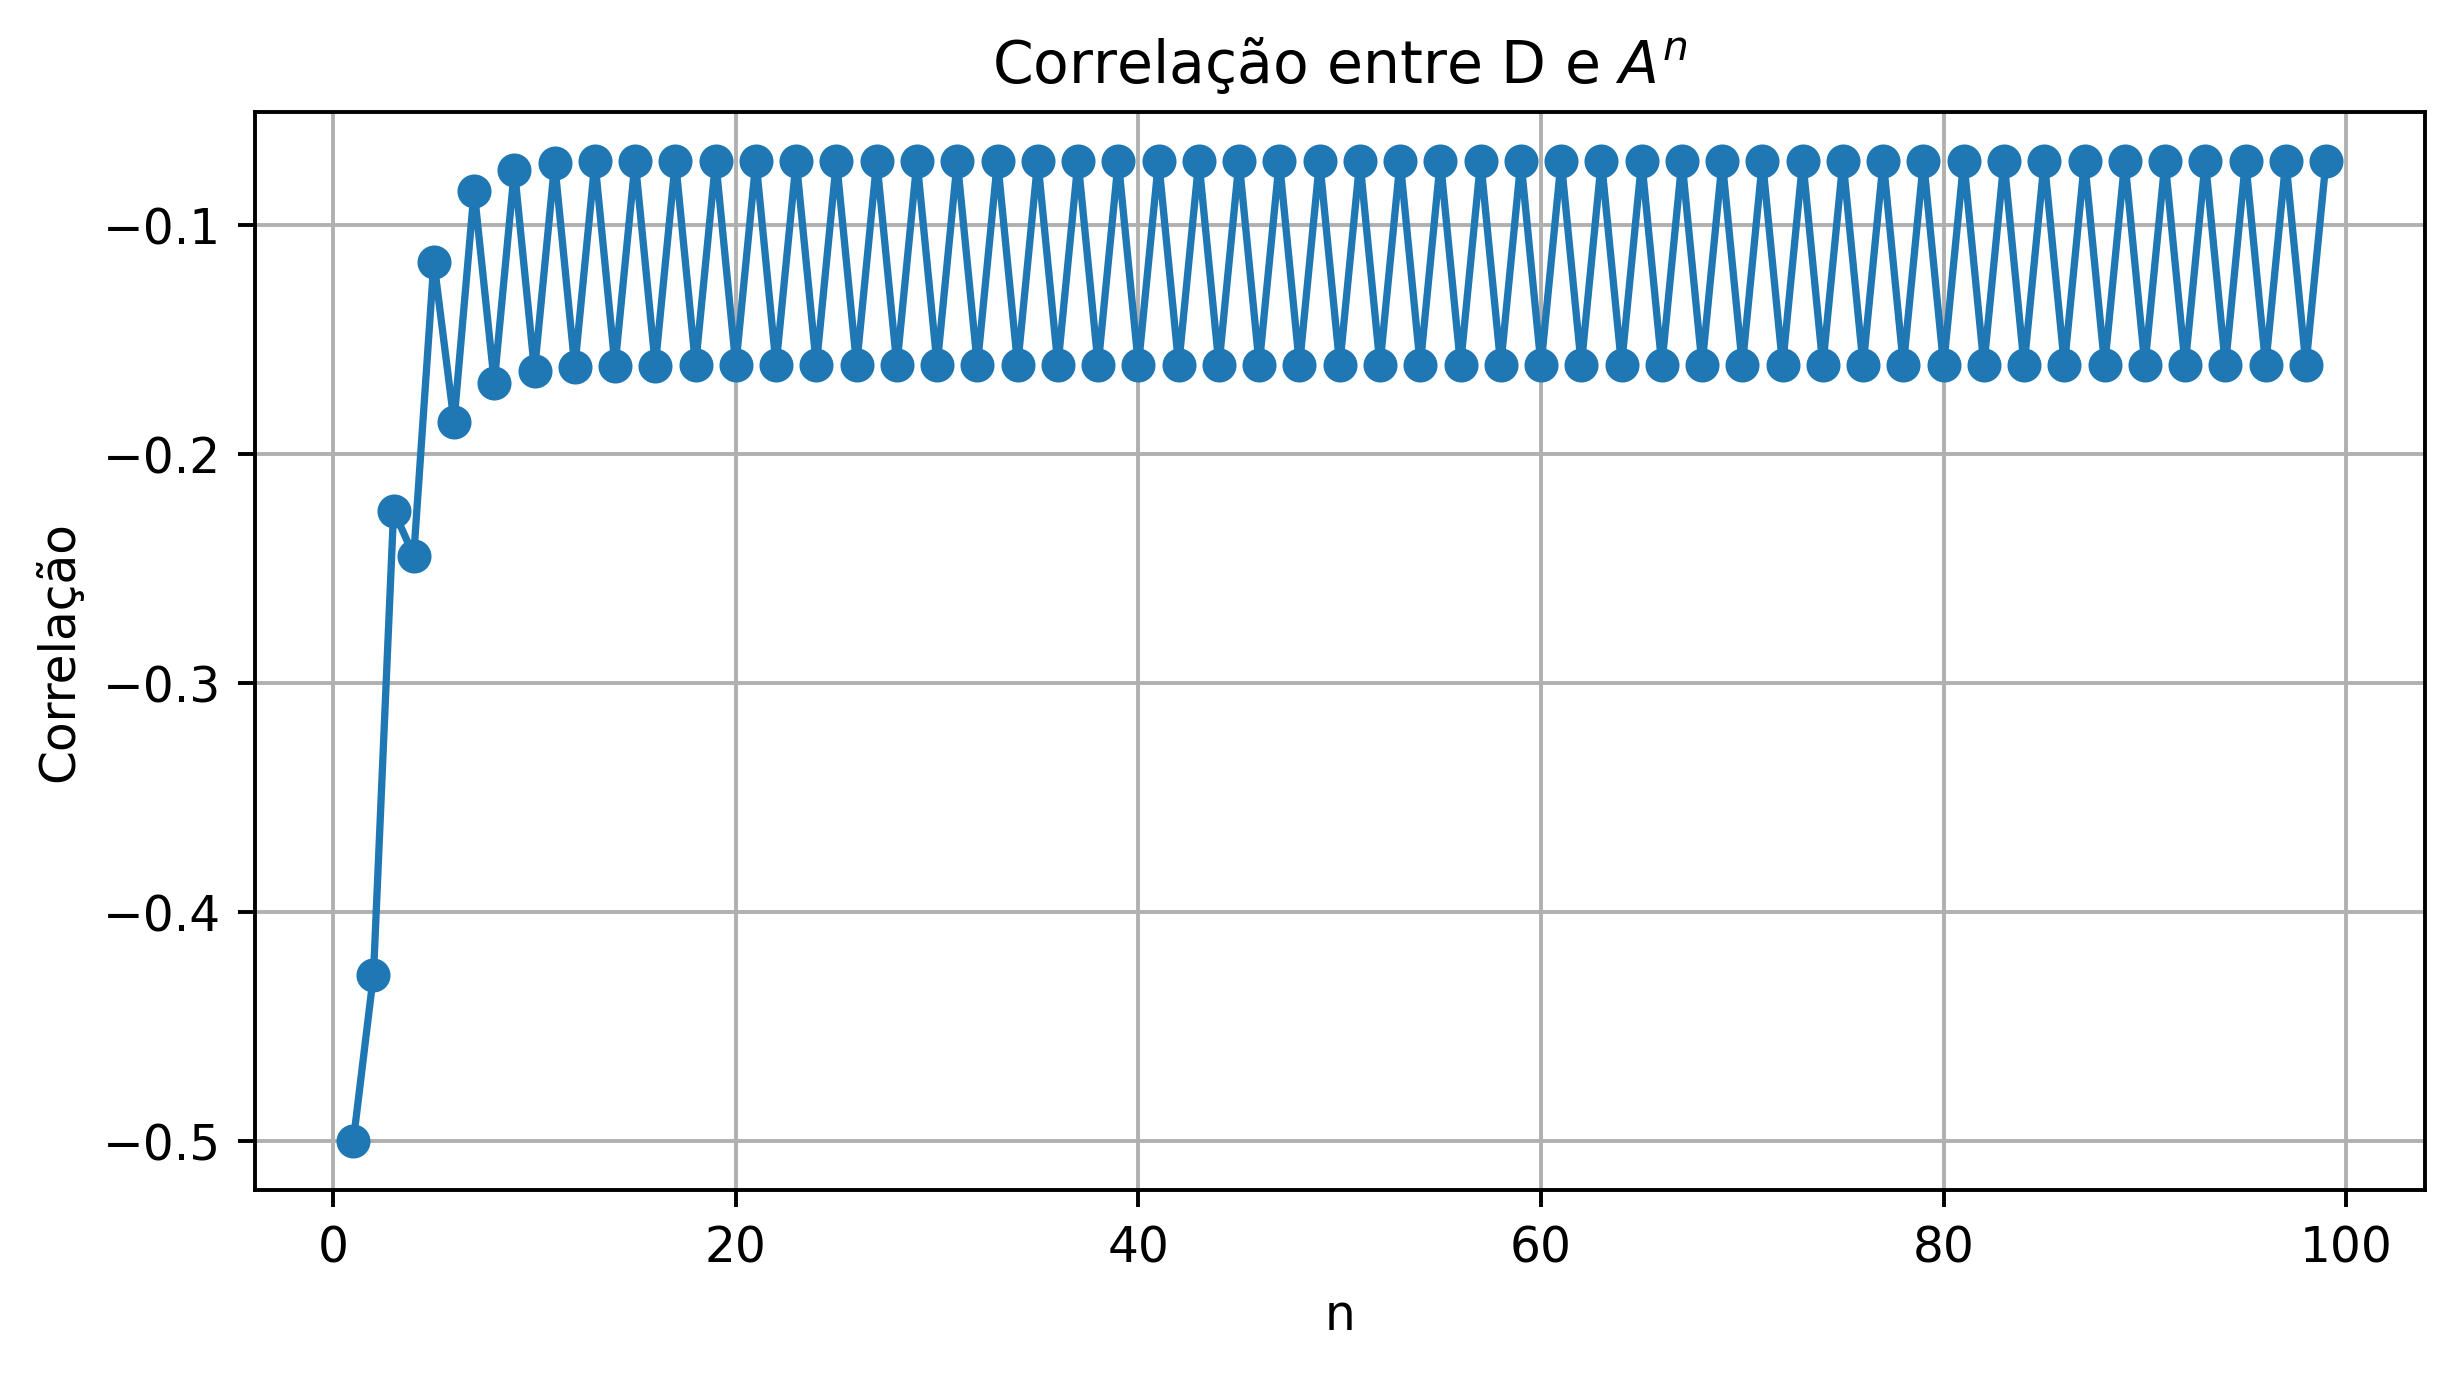

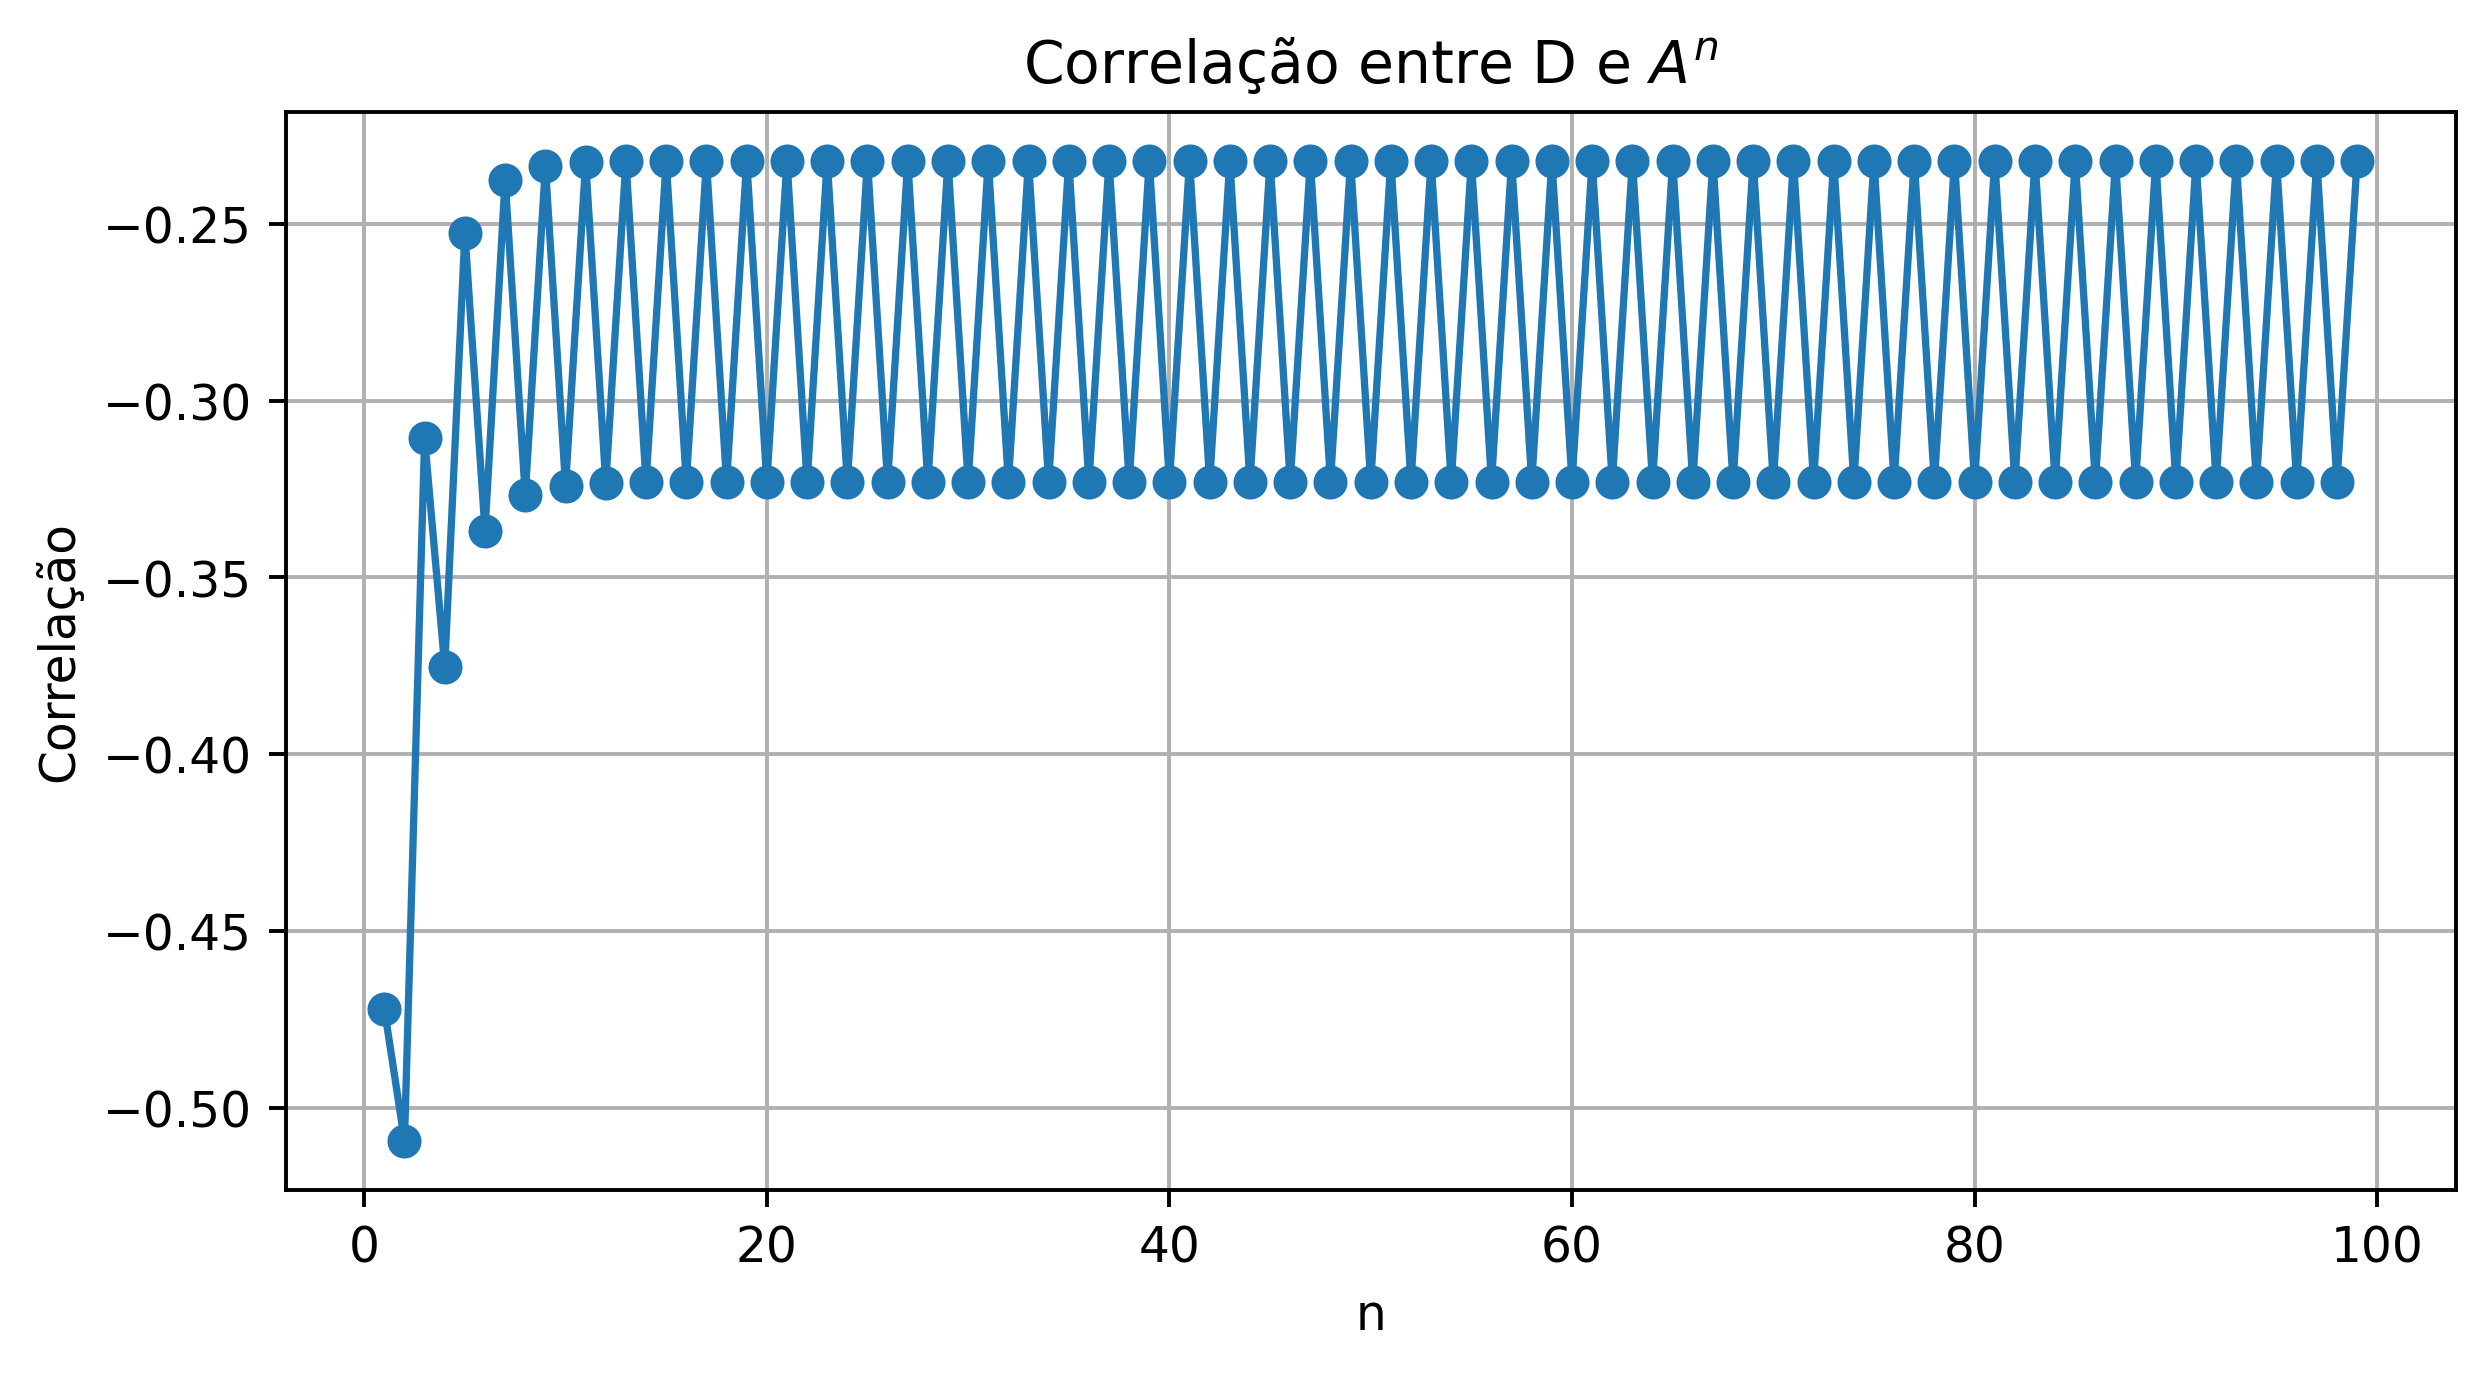

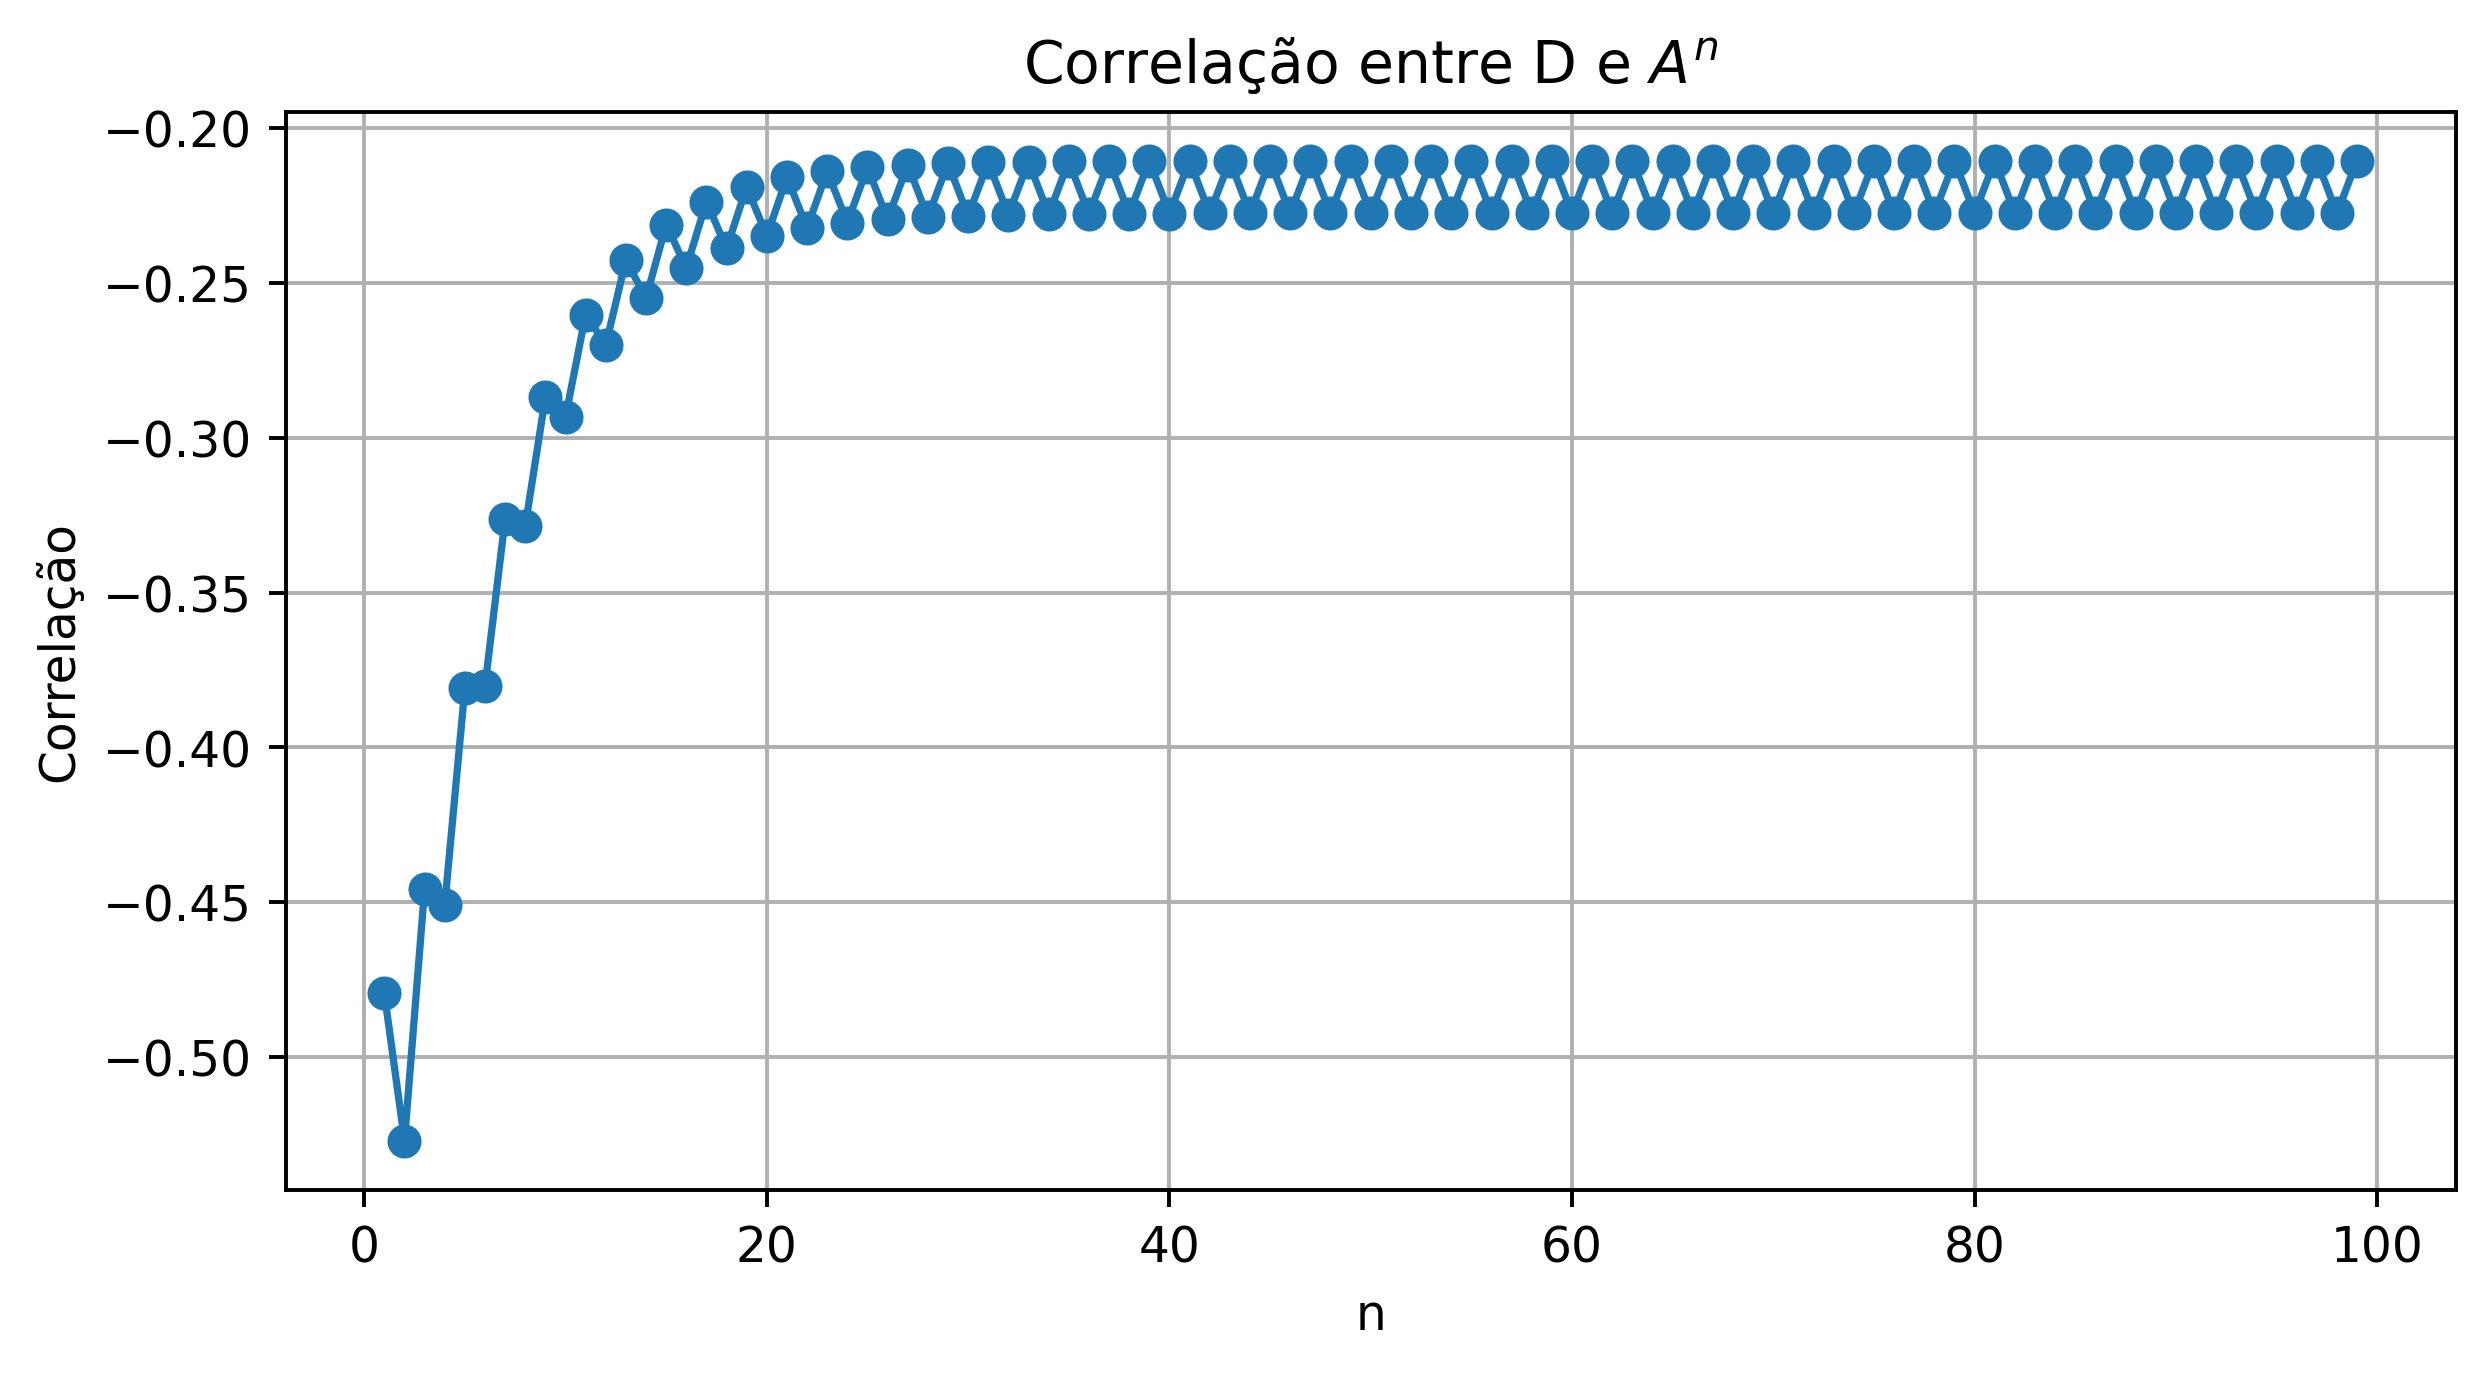

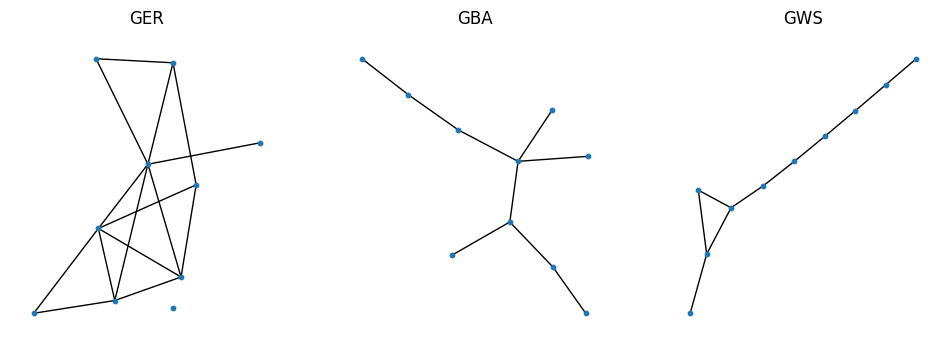

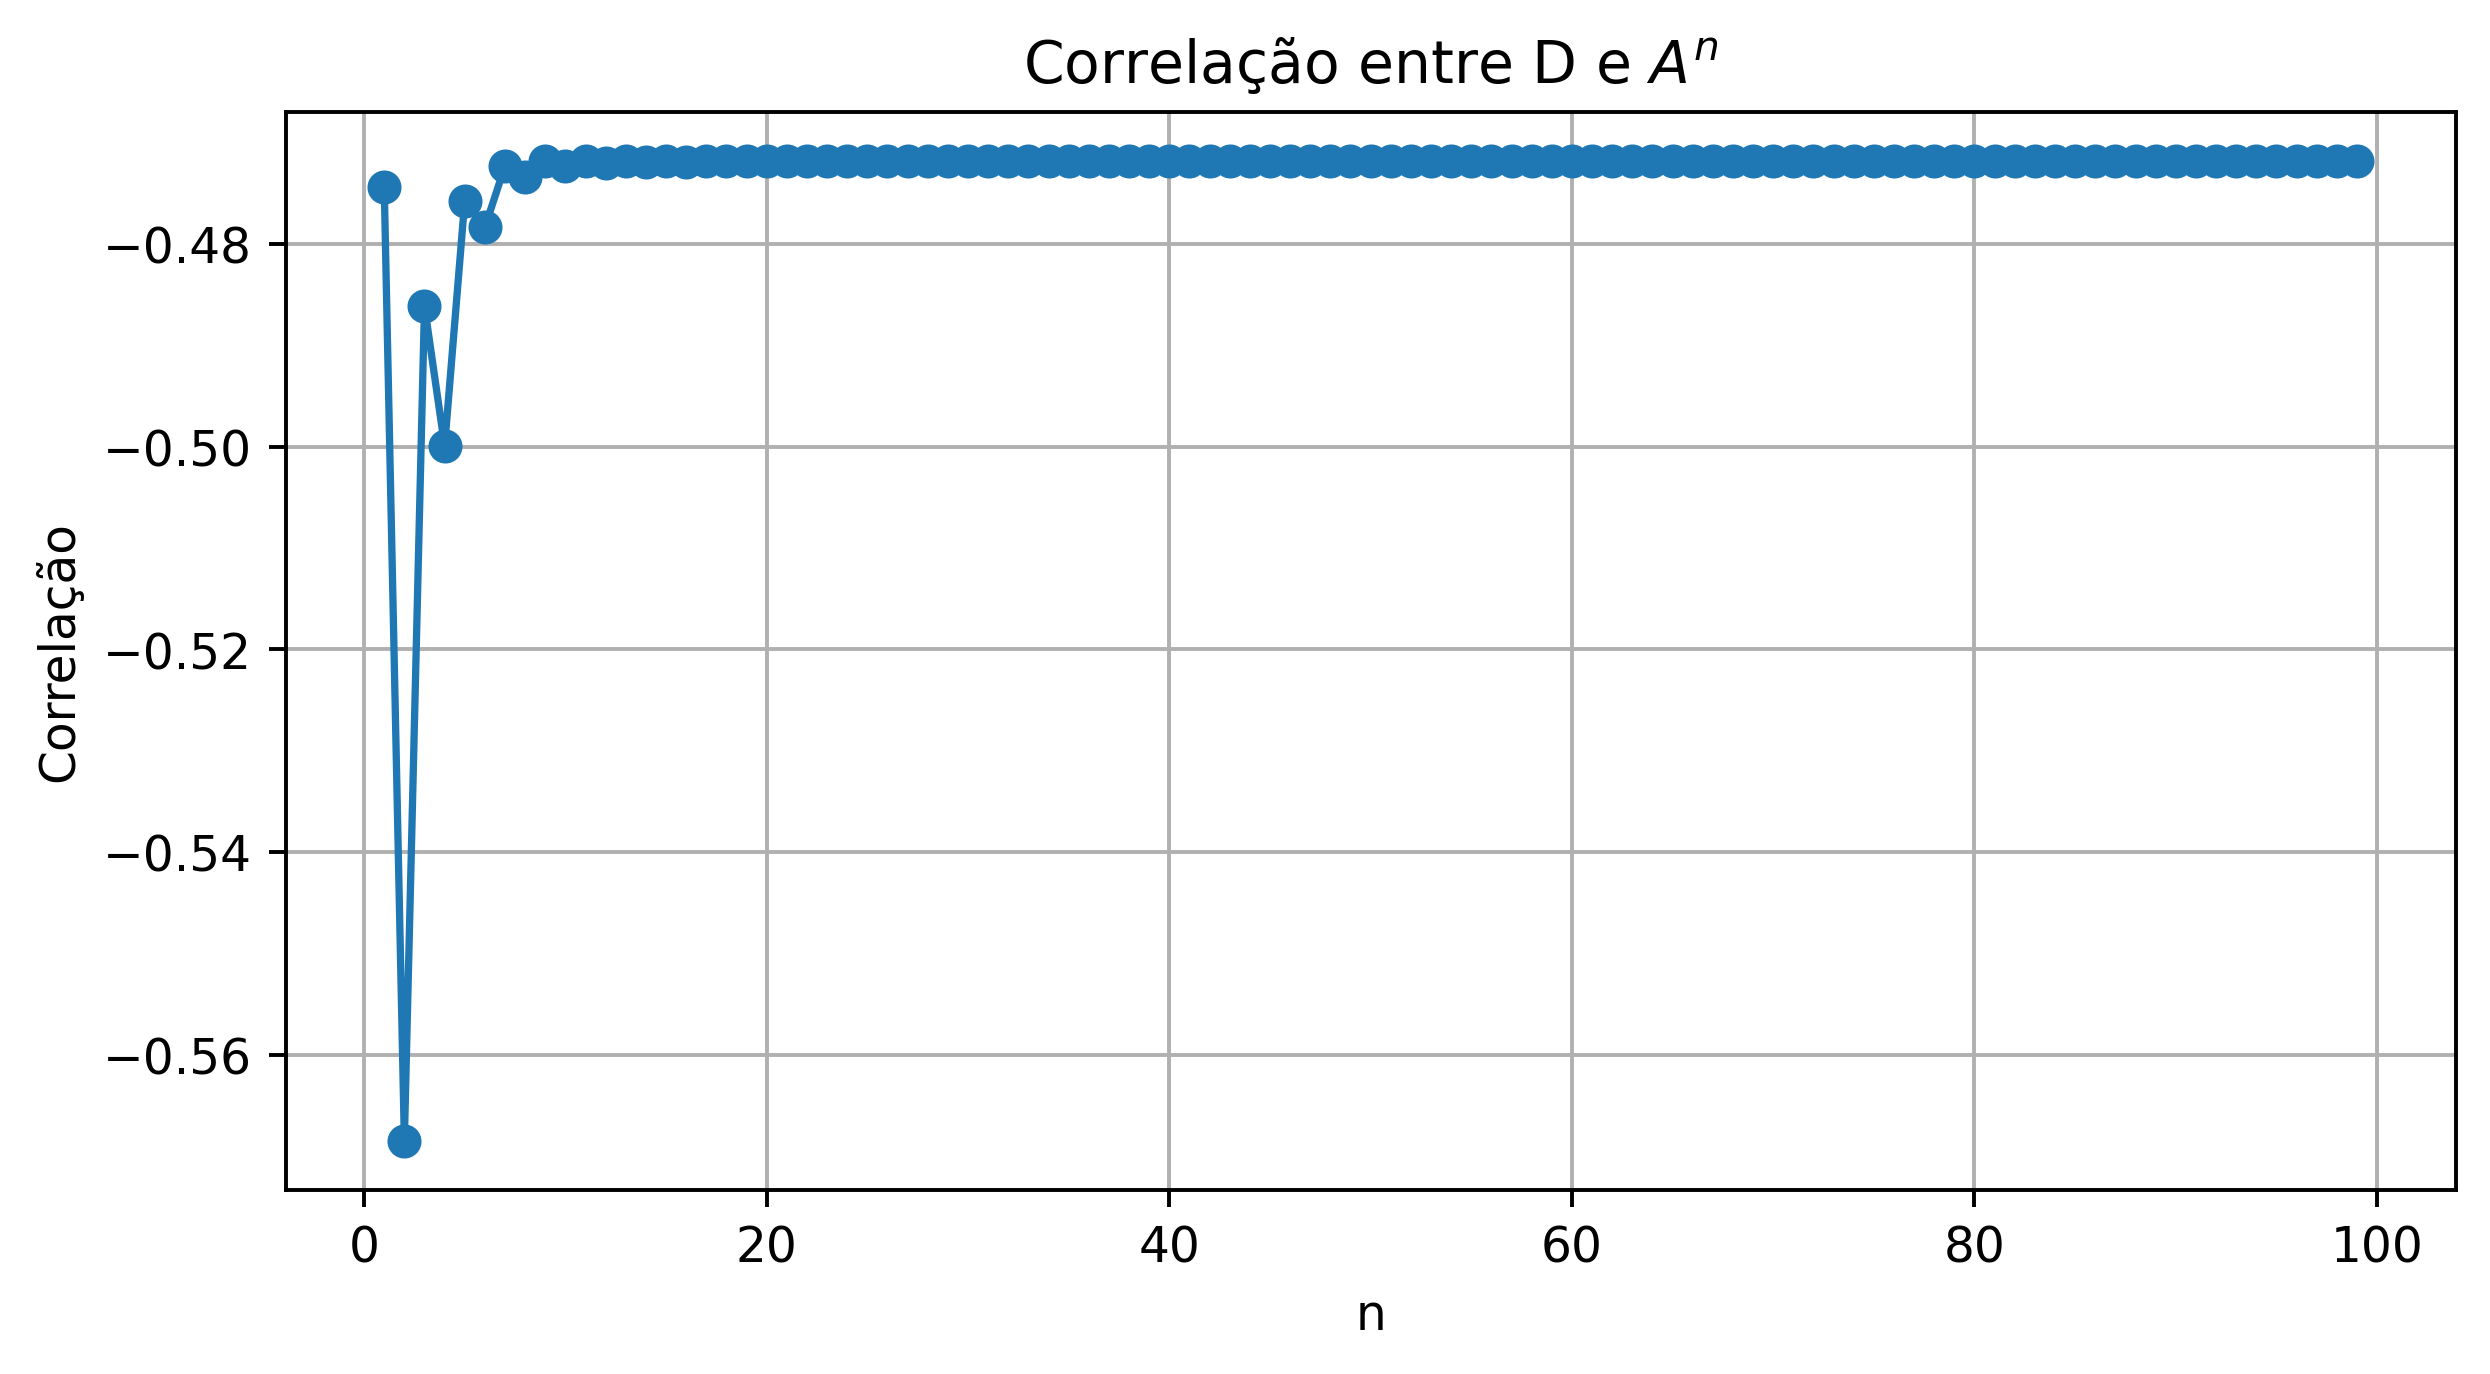

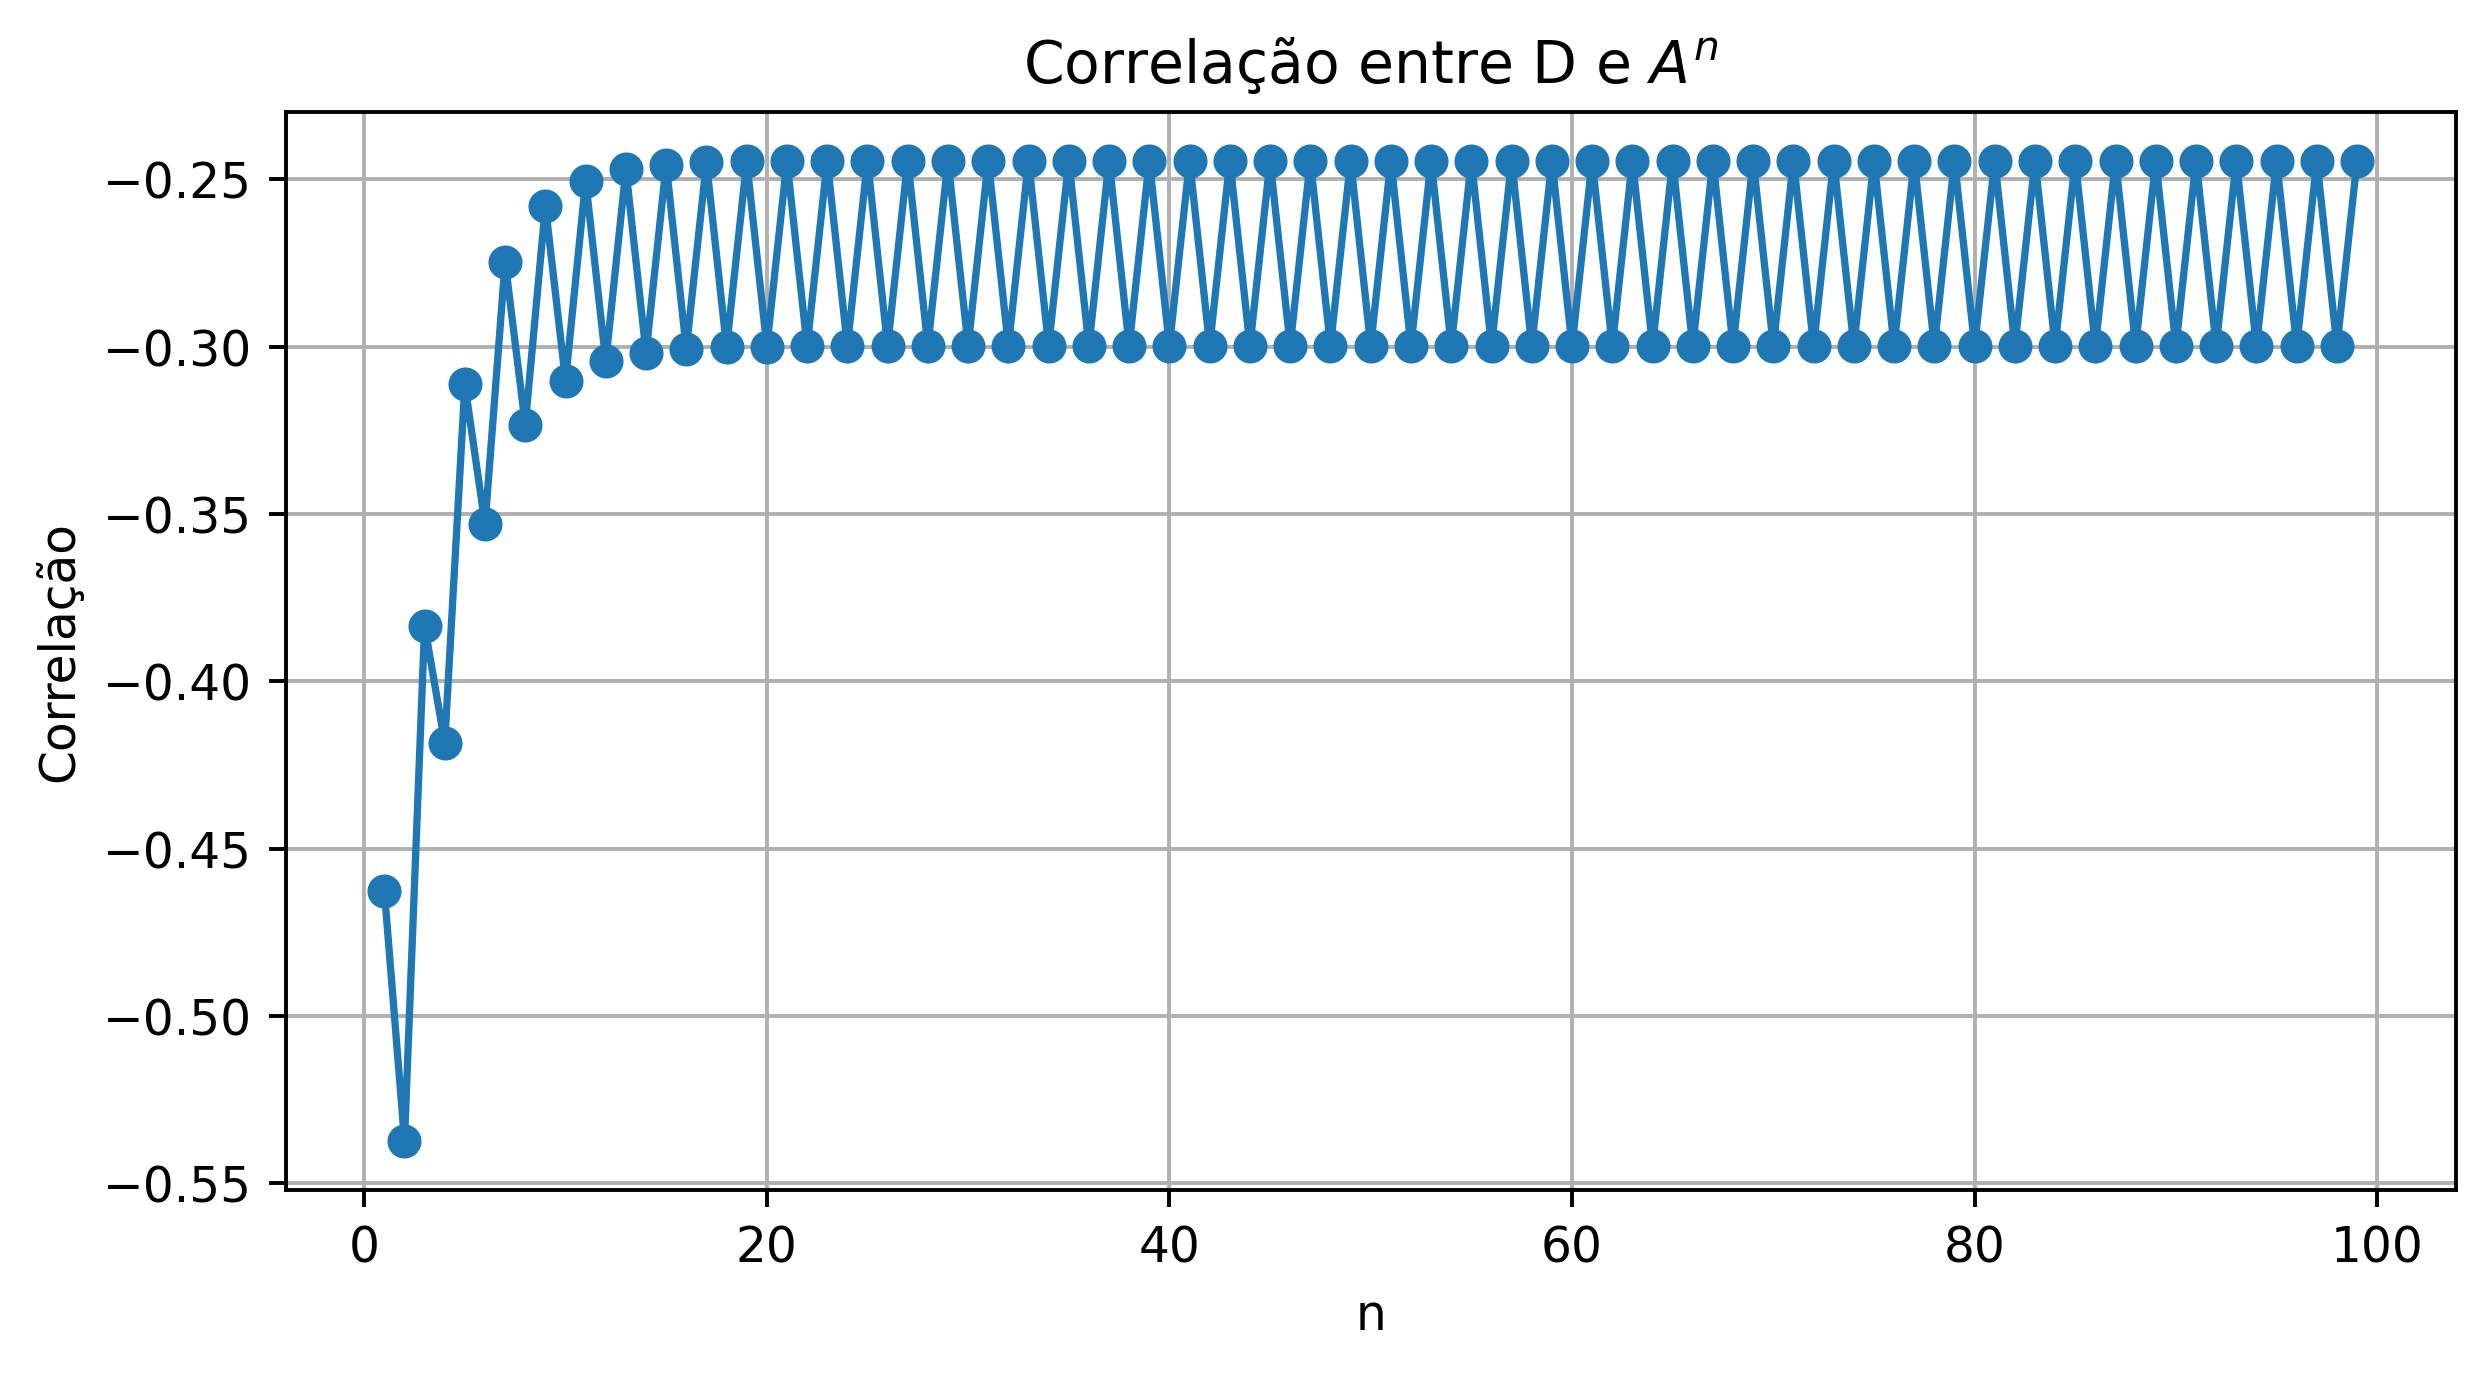

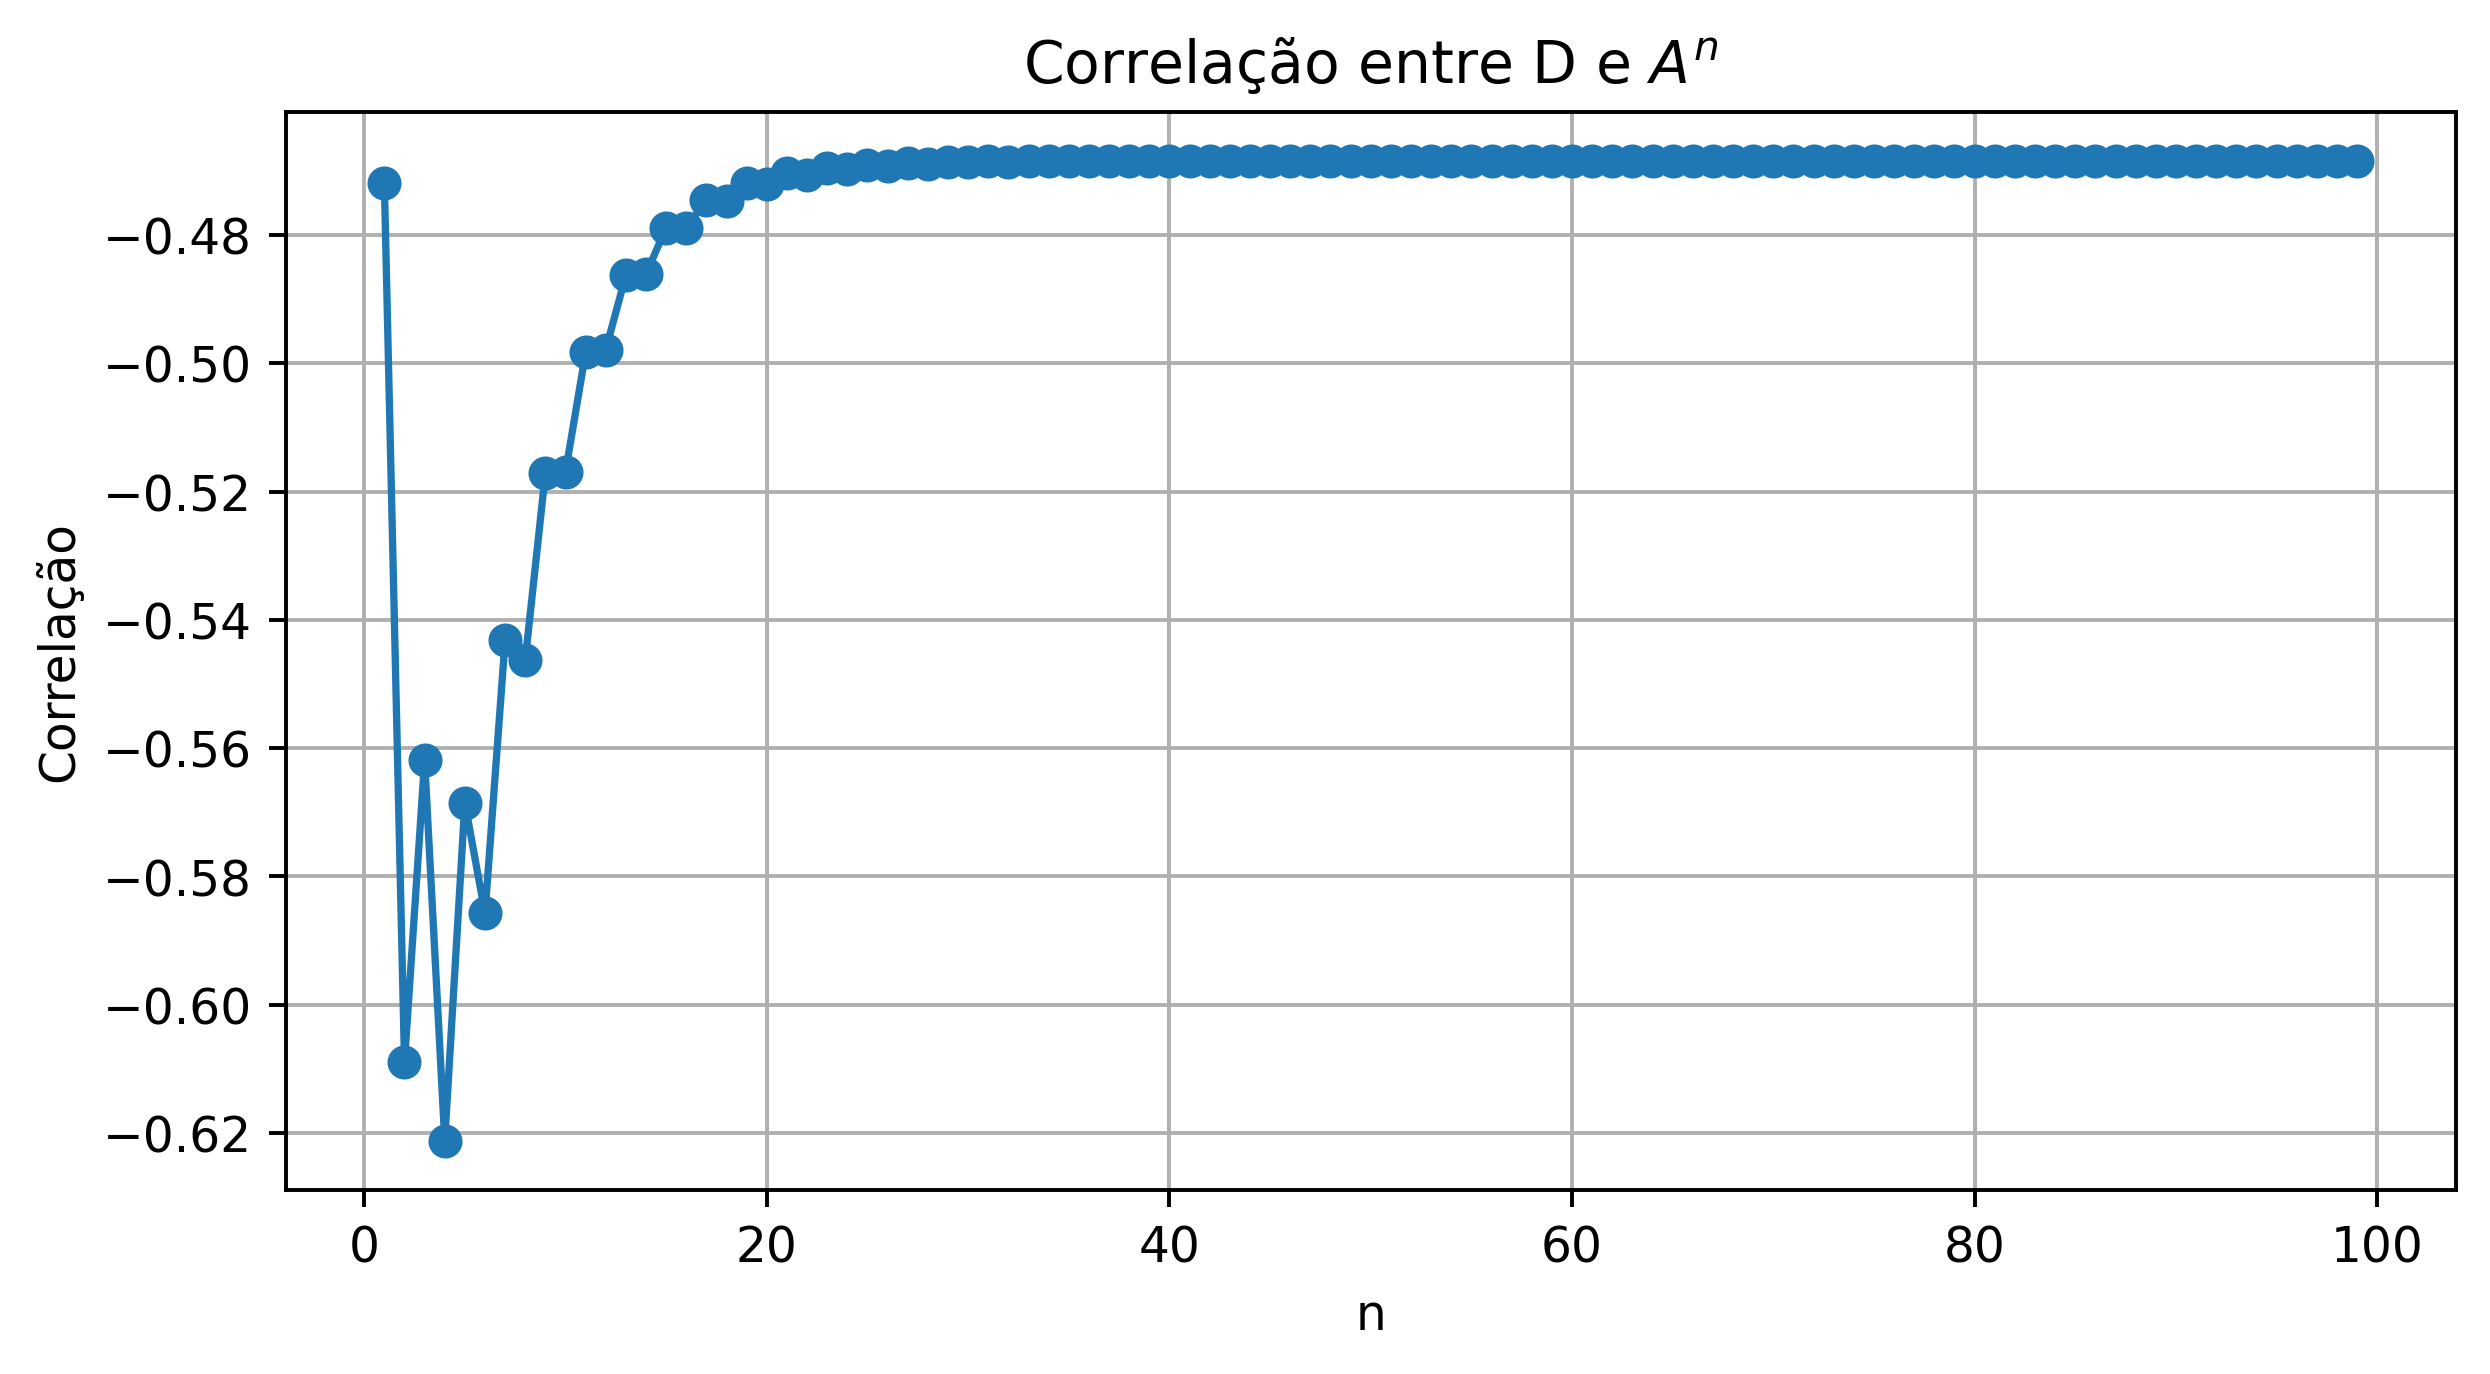

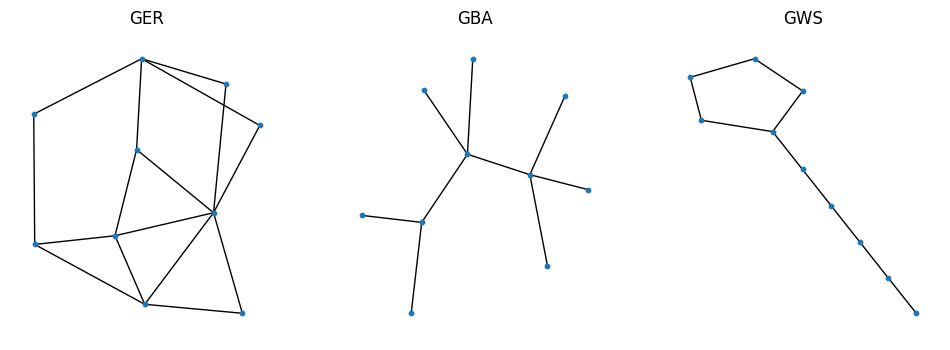

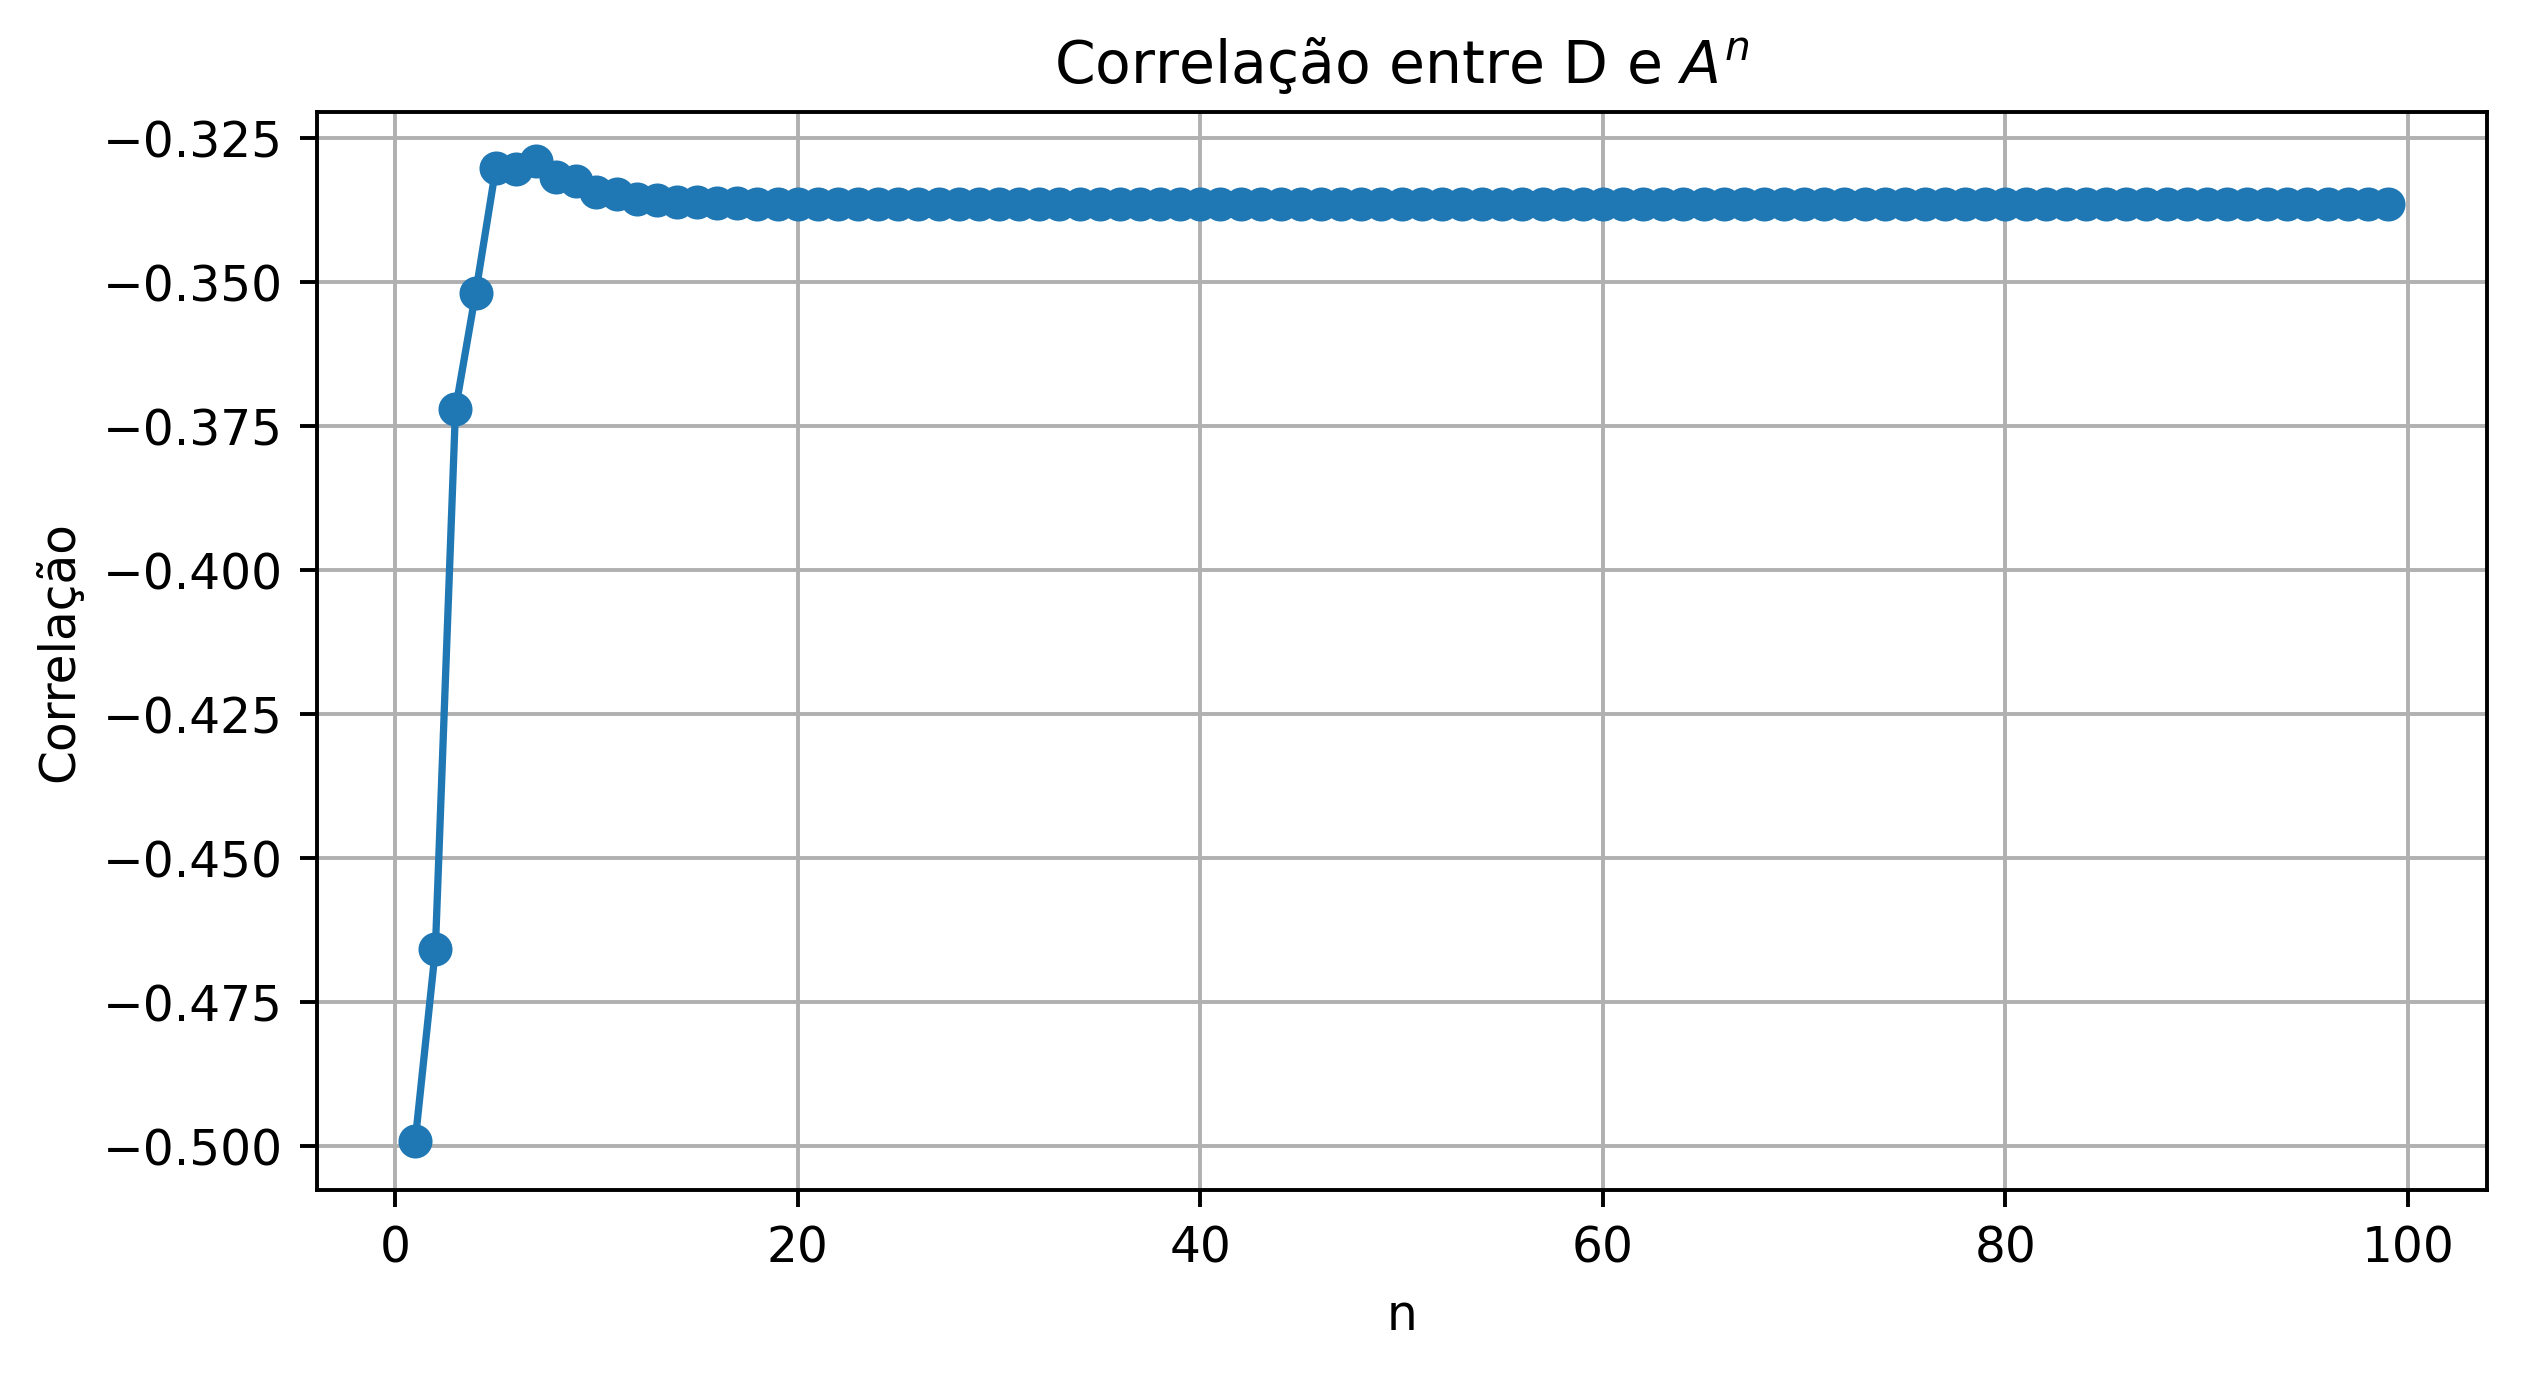

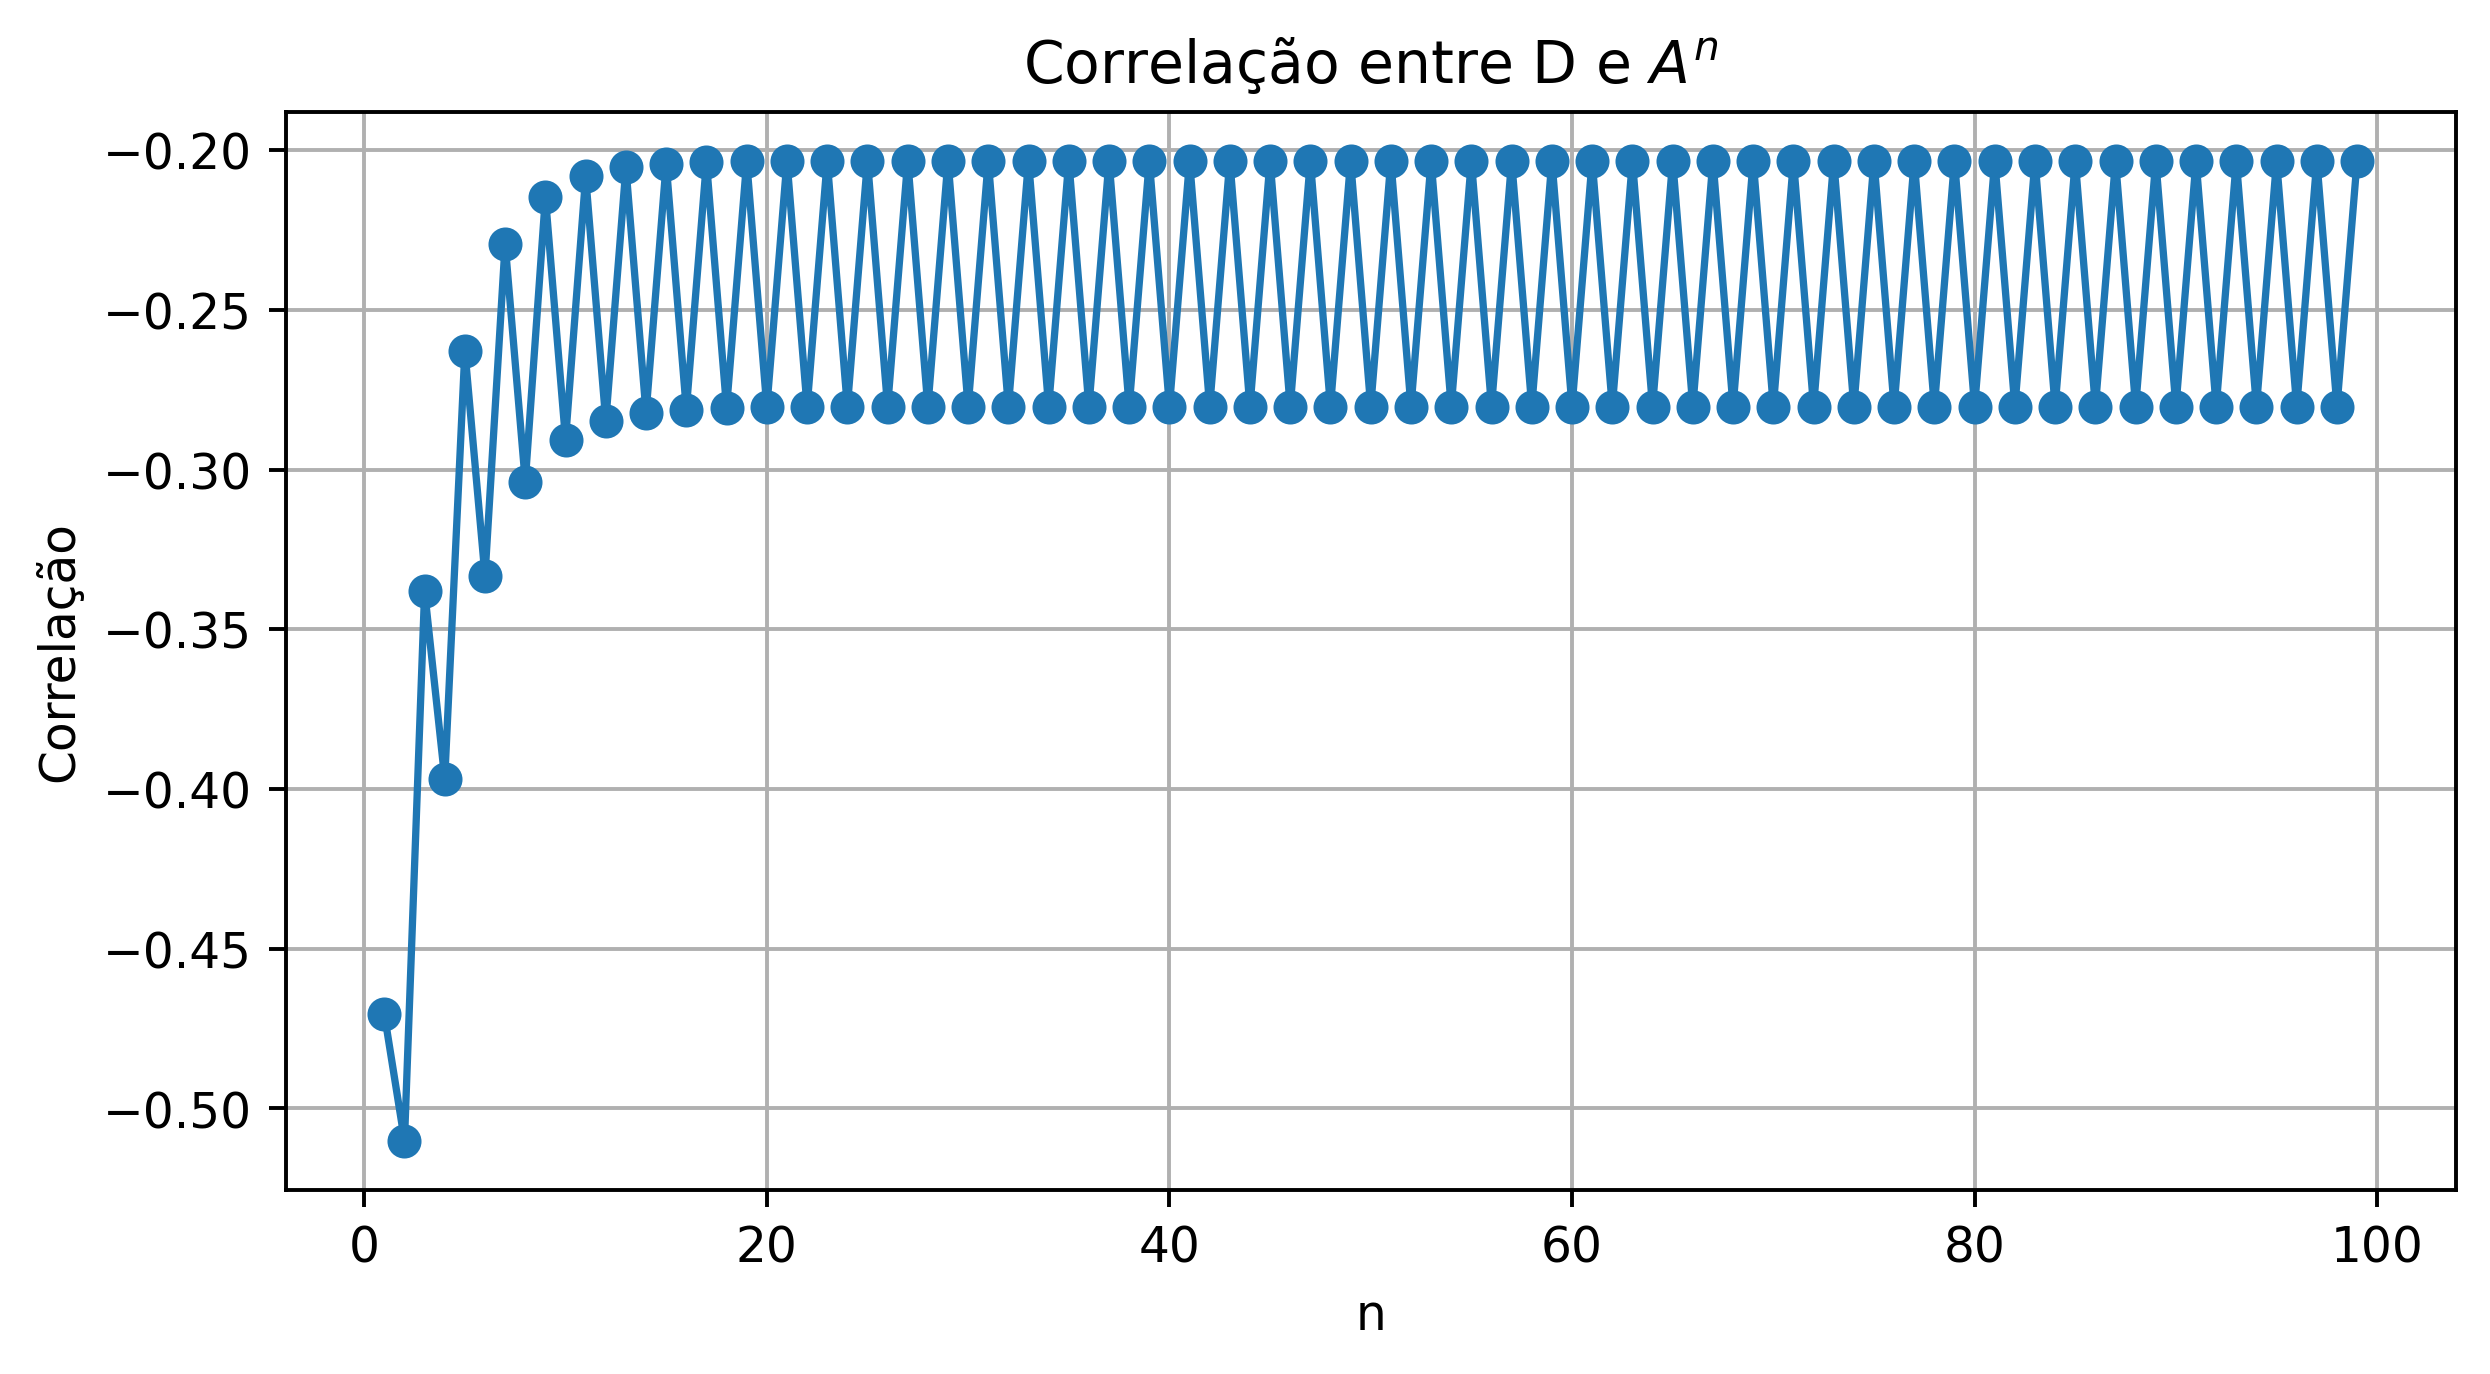

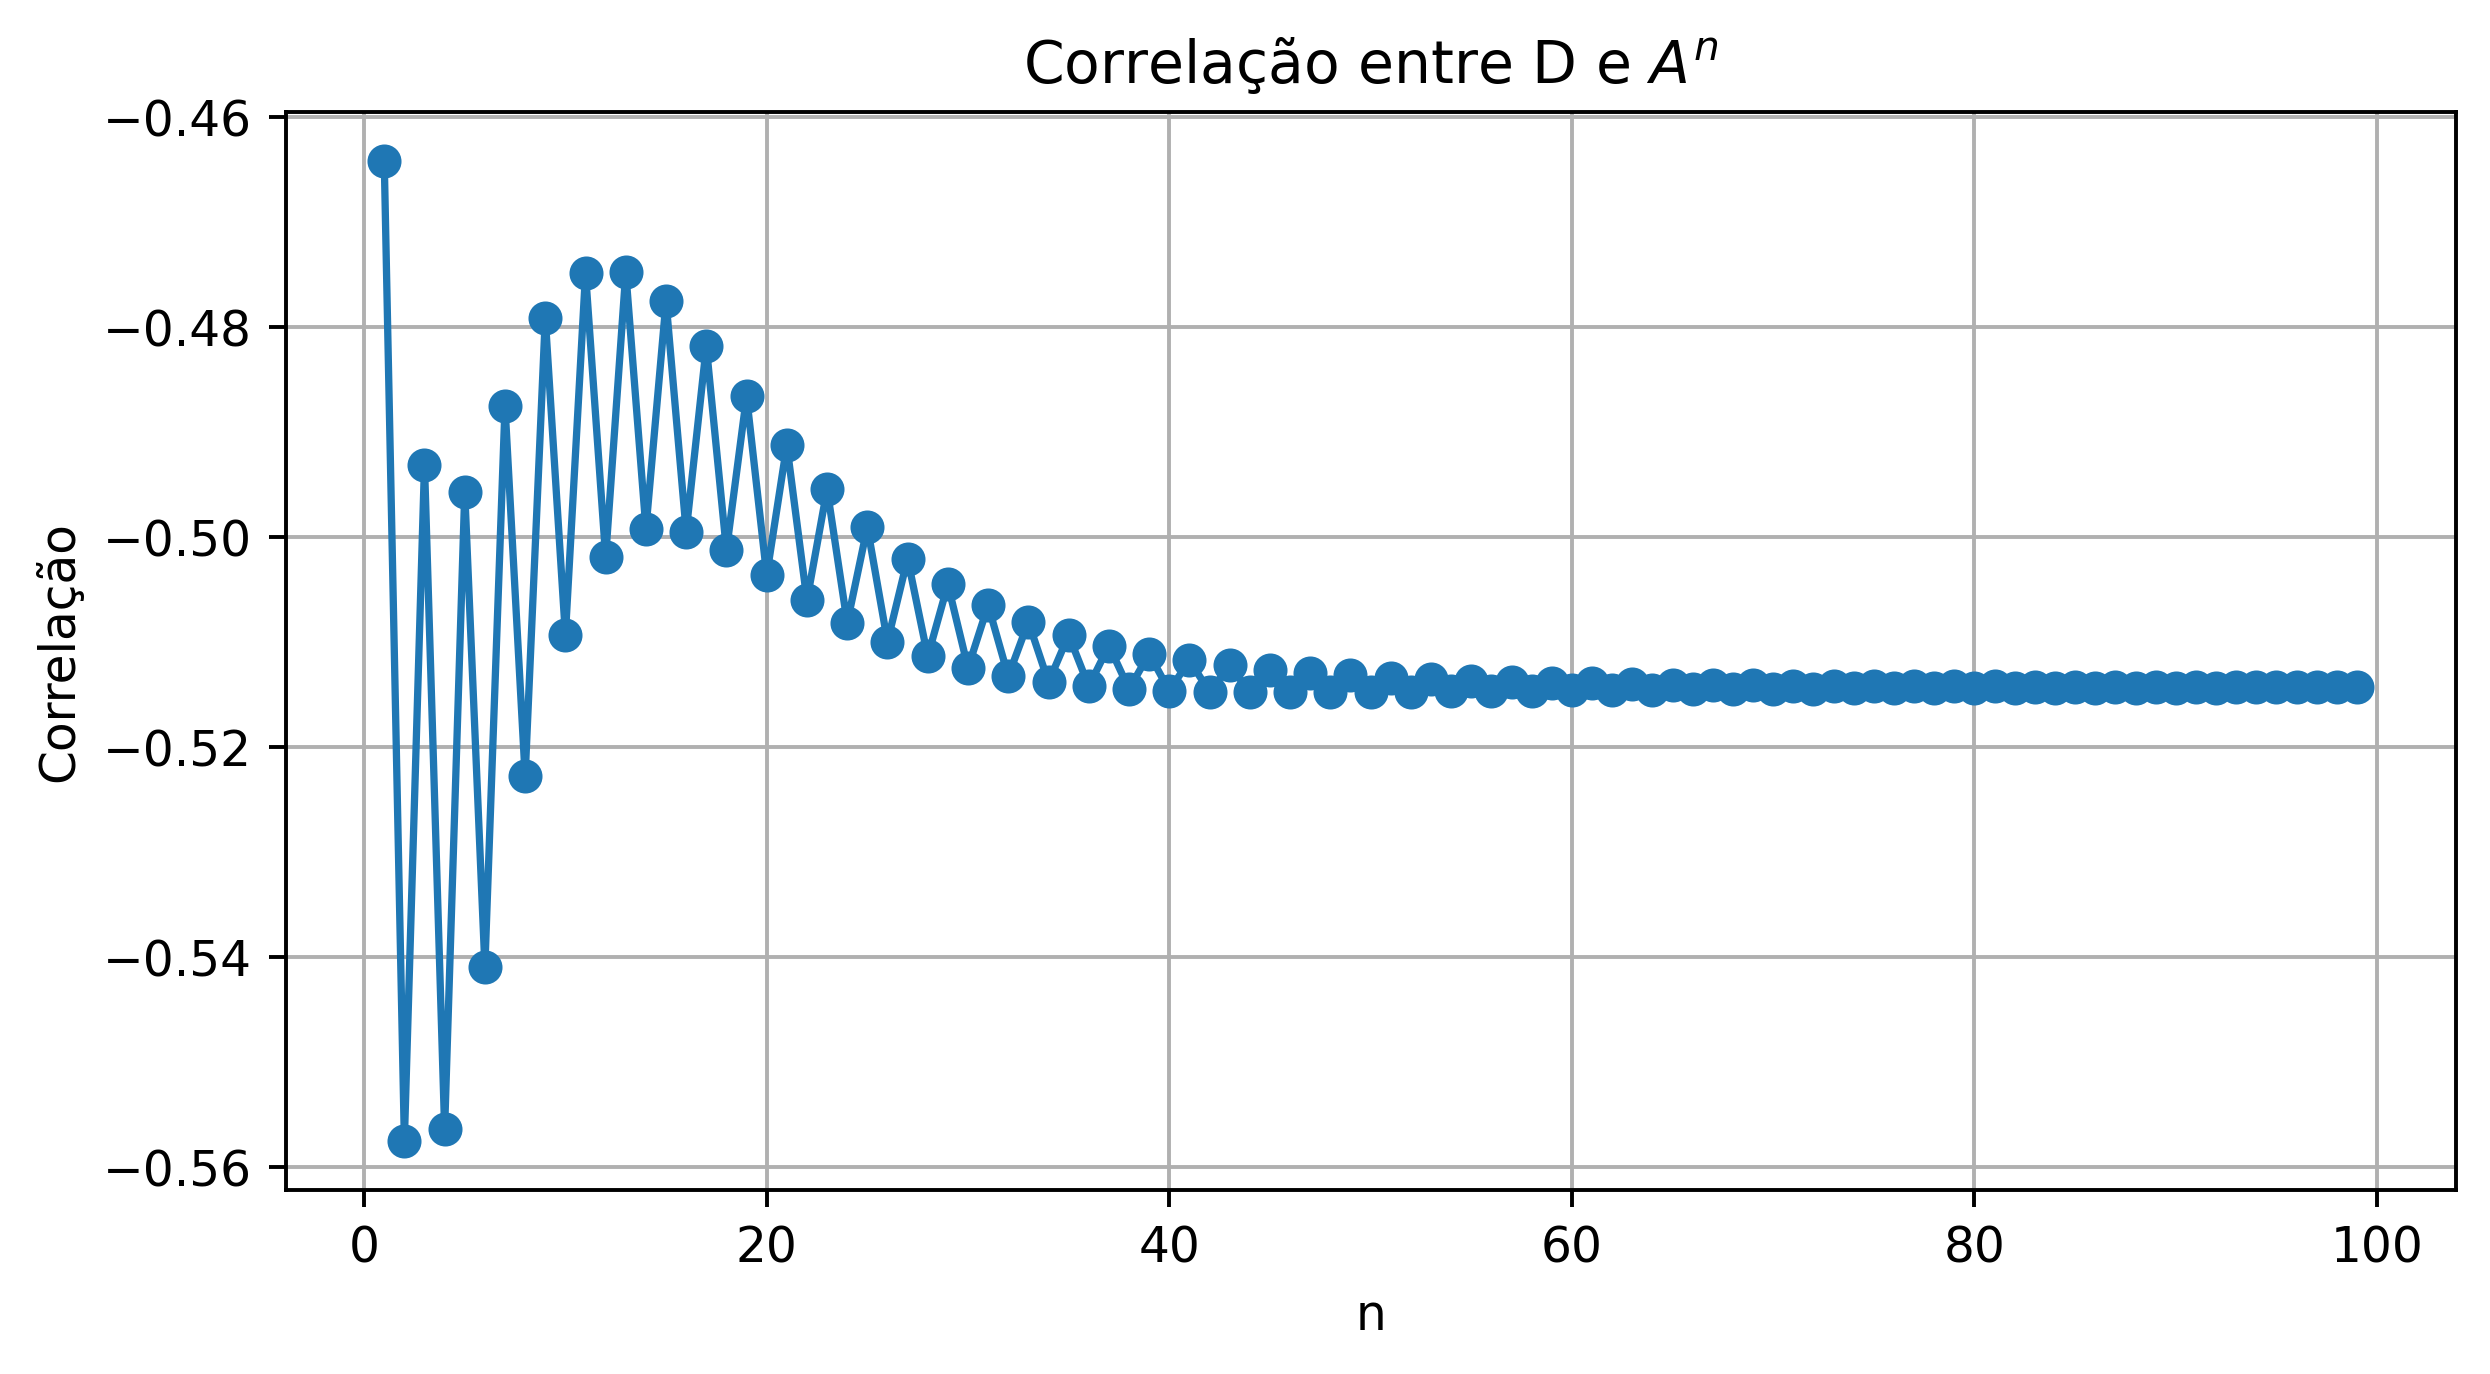

In [76]:
import networkx as nx

# Parâmetros dados
n_nodes = 10
av_degree = 3

# Parâmetros calculados
p = av_degree/(n_nodes-1)
m = int(av_degree/2)
k = int(av_degree)

def m_component(G):
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    return G.subgraph(Gcc[0])


for i in range(0,3):
    # Erdos-Reni
    GER = nx.erdos_renyi_graph(n_nodes, p, seed=None, directed=False)
    # Barabasi-Albert
    GBA = nx.barabasi_albert_graph(n_nodes, m, seed=None)
    # Small-world
    GWS = nx.watts_strogatz_graph(n_nodes, k, p, seed=None)
    
    # Obter a lista de cliques para cada rede
    er_cliques = list(nx.enumerate_all_cliques(GER))
    ba_cliques = list(nx.enumerate_all_cliques(GBA))
    ws_cliques = list(nx.enumerate_all_cliques(GWS))
    
    plt.figure(figsize=(12, 4))

    plt.subplot(1,3,1)
    plt.title("GER")
    nx.draw_kamada_kawai(GER, with_labels=False, node_size=10)
    
    plt.subplot(1,3,2)
    plt.title("GBA")
    nx.draw_kamada_kawai(GBA, with_labels=False, node_size=10)
        
    plt.subplot(1,3,3)
    plt.title("GWS")
    nx.draw_kamada_kawai(GWS, with_labels=False, node_size=10)
    
    plt.show()
        
    GER = m_component(GER)
    GBA = m_component(GBA)
    GWS = m_component(GWS)
    
    corr_D_An(nx.adjacency_matrix(GER).toarray())
    corr_D_An(nx.adjacency_matrix(GBA).toarray())
    corr_D_An(nx.adjacency_matrix(GWS).toarray())
